# **Asignatura**: Aprendizaje Automático

**Práctica 1**: Aprendizaje supervisado.

**Nombre**: Ramón

# **Ejercicio 1: Problema de clasificación (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de clasificación, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para desarrollar sistemas olfativos de Inteligencia Artificial mediante **narices electrónicas (*e-Nose*)**, capaces de determinar la calidad de una muestra de carne en base a los gases emitidos por la misma. El conjunto de datos se obteniene a partir de la investigación realizada en el siguiente artículo:

- Feyzioglu, A.; Taspinar, Y.S. Beef Quality Classification with Reduced E-Nose Data Features According to Beef Cut Types. Sensors 2023, 23, 2222 (URL: <a href="https://www.mdpi.com/1424-8220/23/4/2222">https://www.mdpi.com/1424-8220/23/4/2222</a>)



## Contexto y motivación del problema

Los controles de calidad alimentarios son un conjunto de procedimientos y normativas que se implementan para asegurar que los alimentos sean seguros, saludables y cumplan con los estándares establecidos. Esto incluye la supervisión de la producción, el procesamiento, el almacenamiento y la distribución de los alimentos.

Los controles de calidad pueden abarcar desde la inspección de las materias primas hasta la evaluación del producto final, asegurando que no haya contaminantes y que se mantengan las propiedades nutricionales. Normalmente, el proceso de control de calidad conlleva la toma de muestras de alimentos, su transporte a un laboratorio, la realización de diferentes análisis químicos sobre el alimento y la generación de informes positivos o negativos.

Como alternativa a este proceso, **en esta práctica pretendemos elaborar un modelo de aprendizaje automático** capaz de ser integrado en **sistemas olfativos electrónicos (*e-Noses*)** sensibles a los gases que pueden generar diferentes alimentos frescos o en descomposición. En particular, **nos crentraremos en la clasificación de la calidad de cortes de carne** haciendo uso de diferentes gases generados durante el proceso de descomposición de la misma.

Una **e-Nose** (*nariz electrónica*) es un dispositivo diseñado para detectar y analizar olores de manera similar a como lo hace el sentido del olfato en los seres humanos. Utilizan sensores químicos que pueden identificar diferentes compuestos volátiles en el aire (gases).

Estos dispositivos son muy útiles en diversas aplicaciones, como en la industria alimentaria para controlar la calidad de los productos, en la detección de contaminantes en el medio ambiente, o incluso en la medicina para identificar enfermedades a través del análisis de olores específicos.

La tecnología detrás de las narices electrónicas puede variar. En general, combinan sensores, algoritmos de procesamiento de datos y aprendizaje automático para interpretar los olores y proporcionar información útil.

<center>
<img src="https://cdn.open-pr.com/V/5/V505414311_g.jpg" />
</center>

## El conjunto de datos

El conjunto de datos original se encuentra disponible con acceso público en el enlace <a href="https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/XNFVTS">https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/XNFVTS</a>.


Se trata de un conjunto de datos que contiene 12 tipos de cortes de carne diferentes (redondo, solomillo superior, filete de lomo, carne de aleta, lomo corto, falda, terrón, carne de falta, interior/exterior, costillas, espinilla y grasa). Los cortes fueron monitorizados durante 37h hasta su deterioro utilizando 11 tipos de sensores de gas distintos. En cada medición, se asignó una categoría del estado de la carne con 4 etiquetas indicando la calidad "excelente", "buena", "aceptable" y "estropeada".


El **objetivo de la práctica** es desarrollar un modelo de aprendizaje automático capaz de clasificar el estado de una muestra de carne, independientemente de su tipo de corte, partiendo de los datos proporcionados por cada uno de los sensores. El modelo de decisión para determinar el estado de la carne a partir de los datos de los sensores necesita ser entrenado previamente para tener un desempeño correcto. El conjunto de datos a utilizar ha sido preprocesado y extraído a partir de los datos originales, y tiene el siguiente formato:

- **Datos de entrada (X)**: Valor de medición de cada tipo de sensor de gas (en total 11 tipos distintos).
- **Datos de salida (Y)**: Clasificación del tipo de carne.


El conjunto de datos a usar en la práctica se encuentra accesible desde el enlace mostrado en la siguiente celda de código, el cual deberá ser usado por el estudiante para elaborar la práctica.

In [1]:
import pandas as pd

path_to_data_classification= 'https://www.dropbox.com/scl/fi/3zmizfgjfz5xbbr7xcn2x/MeatClassification.csv?rlkey=81gz5xipne04whrniwqc40r21&st=7o73a6qs&dl=1'

df= pd.read_csv(path_to_data_classification)
df.head(5)


,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9,Cut,Label
0,16.28,8.01,11.67,13.49,7.09,18.20,7.68,10.39,14.63,34.71,10.53,Striploin,Excellent
1,11.89,8.01,18.43,12.59,7.09,15.08,4.84,19.02,15.35,41.58,11.21,Shin,Spoiled
2,12.87,6.77,22.40,12.05,6.86,16.04,4.60,20.33,18.25,34.51,11.30,Inside-Outside,Spoiled
3,9.78,4.41,12.88,11.35,7.11,13.14,4.76,14.63,19.61,25.20,14.23,Brisket,Acceptable
4,16.42,10.14,13.30,18.36,8.92,27.75,7.62,12.06,16.72,44.07,14.70,Fat,Excellent


El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.

## 1.1 Análisis descriptivo del problema y análisis exploratorio de los datos

Tenemos 2400 entradas con 13 atributos, 11 de entrada y uno de salida (Label). Nuestro objetivo es clasificar el estado de la carne en función de los valores de medición de cada tipo de sensor de gas.

In [2]:
df

,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9,Cut,Label
0,16.28,8.01,11.67,13.49,7.09,18.20,7.68,10.39,14.63,34.71,10.53,Striploin,Excellent
1,11.89,8.01,18.43,12.59,7.09,15.08,4.84,19.02,15.35,41.58,11.21,Shin,Spoiled
2,12.87,6.77,22.40,12.05,6.86,16.04,4.60,20.33,18.25,34.51,11.30,Inside-Outside,Spoiled
3,9.78,4.41,12.88,11.35,7.11,13.14,4.76,14.63,19.61,25.20,14.23,Brisket,Acceptable
4,16.42,10.14,13.30,18.36,8.92,27.75,7.62,12.06,16.72,44.07,14.70,Fat,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,13.03,5.13,19.07,7.91,5.14,12.19,4.50,15.63,16.12,35.31,9.36,Striploin,Acceptable
2396,12.18,8.01,18.43,12.59,7.14,15.08,4.84,18.94,15.35,41.05,11.34,Shin,Spoiled
2397,8.73,4.13,25.19,12.49,7.58,11.04,4.02,19.62,23.16,27.27,13.67,Brisket,Spoiled
2398,13.08,5.18,19.07,7.94,5.18,12.23,4.58,14.75,16.12,33.17,9.04,Striploin,Acceptable


Vemos como para estado excelente hay 600 entradas de diferentes tipos de corte:

In [3]:
df_Excellent = df[df['Label'] == 'Excellent']
print(df_Excellent.shape[0], "filas y", df_Excellent.shape[1], "columnas")
df_Excellent

600 filas y 13 columnas


,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9,Cut,Label
0,16.28,8.01,11.67,13.49,7.09,18.20,7.68,10.39,14.63,34.71,10.53,Striploin,Excellent
4,16.42,10.14,13.30,18.36,8.92,27.75,7.62,12.06,16.72,44.07,14.70,Fat,Excellent
5,14.52,11.45,13.46,16.47,8.92,21.14,7.71,9.91,13.60,42.94,12.42,Shin,Excellent
15,18.39,8.77,10.50,18.04,6.83,19.43,7.86,8.51,16.12,43.78,12.92,Tenderloin,Excellent
16,13.18,23.78,10.34,15.99,7.49,13.19,9.37,7.96,6.22,27.41,11.39,Rib_eye,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,12.98,38.10,3.36,19.03,8.81,18.13,22.92,6.11,3.72,46.19,14.06,Skirt_meat,Excellent
2371,13.34,32.85,5.84,16.12,12.15,12.63,17.34,7.89,3.62,43.78,9.48,Round,Excellent
2379,14.40,6.66,13.36,10.45,6.56,13.62,8.91,11.41,17.50,41.84,12.37,Inside-Outside,Excellent
2382,14.28,7.76,12.83,13.27,6.61,17.67,5.89,10.03,17.58,37.67,16.22,Clod_Chuck,Excellent


Los 11 atributos de entrada son de tipo float y el de salida de tipo object:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MQ135   2400 non-null   float64
 1   MQ136   2400 non-null   float64
 2   MQ137   2400 non-null   float64
 3   MQ138   2400 non-null   float64
 4   MQ2     2400 non-null   float64
 5   MQ3     2400 non-null   float64
 6   MQ4     2400 non-null   float64
 7   MQ5     2400 non-null   float64
 8   MQ6     2400 non-null   float64
 9   MQ8     2400 non-null   float64
 10  MQ9     2400 non-null   float64
 11  Cut     2400 non-null   object 
 12  Label   2400 non-null   object 
dtypes: float64(11), object(2)
memory usage: 243.9+ KB


Vemos como cada uno de los atributos de entrada tiene 2400 apariciones y sus medias están entre 8 y 35:

In [5]:
df.describe()

,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,12.867592,8.653604,16.154671,12.335779,6.928496,14.679063,6.528142,15.001271,16.379921,35.730154,12.122863
std,2.828903,6.989394,5.454674,2.669185,1.560192,3.434043,3.498708,5.015889,6.164918,6.735156,2.168585
min,8.030000,2.780000,3.160000,7.700000,3.870000,7.880000,2.230000,5.600000,2.910000,15.990000,8.230000
25%,10.570000,5.250000,13.040000,10.310000,5.720000,12.680000,4.660000,11.460000,15.202500,31.570000,10.410000
50%,12.920000,6.800000,17.000000,12.050000,6.750000,14.470000,5.410000,14.390000,16.340000,36.780000,11.800000
75%,14.400000,8.070000,19.930000,13.820000,7.490000,15.987500,7.530000,17.820000,18.170000,41.320000,13.610000
max,20.510000,39.030000,28.670000,19.910000,12.640000,29.670000,24.250000,32.610000,41.050000,49.170000,18.170000


Mostramos un histograma de uno de sus valores, MQ135. La mayoría de las entradas para este valor están entre 12 y 16, aunque también entre 8 y 9:

<Axes: ylabel='Frequency'>

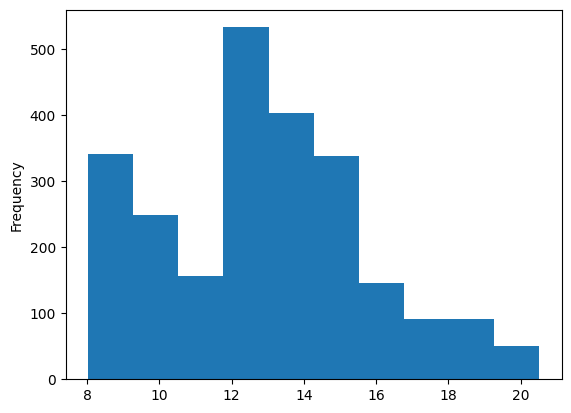

In [6]:
df.MQ135.plot(kind='hist')

Ahora vamos a ver los valores de alguna de las mediciones en relación al estado de la carne. Observamos como la cantidad de estos 4 atributos es proporcional al estado de esta, siendo mayor cuando la calidad es excelente y menor cuando se deteriora:

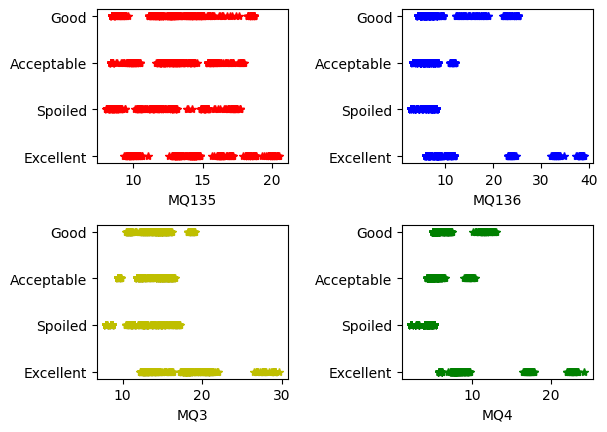

In [7]:
import numpy as np
import matplotlib.pyplot as plt

colores= ('r*', 'b*', 'y*', 'g*')
atributos = ('MQ135', 'MQ136', 'MQ3', 'MQ4')


f= plt.figure()
for i, color in enumerate(colores):
  plt.subplot(2, 2, i+1)
  plt.plot(df[atributos[i]], df['Label'], color)
  plt.xlabel(atributos[i])

plt.subplots_adjust(hspace=0.4, wspace=0.6)

plt.show()

Dibujamos un boxplot o gráfico de cajas y bigotes con los valores que toma MQ135 según el estado de la carne. De nuevo podemos observar que a mejor estado, mayor cantidad de MQ135.

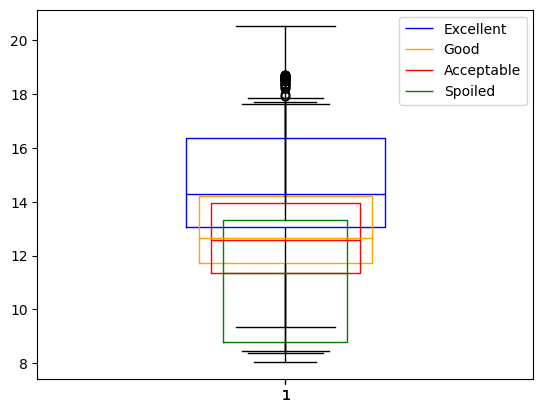

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.boxplot(df[df['Label'] == 'Excellent']['MQ135'], label='Excellent', medianprops=dict(color='blue'), boxprops=dict(color='blue'), widths=0.4)
plt.boxplot(df[df['Label'] == 'Good']['MQ135'], label='Good', medianprops=dict(color='orange'), boxprops=dict(color='orange'), widths=0.35)
plt.boxplot(df[df['Label'] == 'Acceptable']['MQ135'], label='Acceptable', medianprops=dict(color='red'), boxprops=dict(color='red'), widths=0.3)
plt.boxplot(df[df['Label'] == 'Spoiled']['MQ135'], label='Spoiled', medianprops=dict(color='green'), boxprops=dict(color='green'), widths=0.25)
plt.legend()
plt.show()

## 1.3.1 Protocolo de validación experimental

Antes de realizar ```1.2 Preprocesado de datos```, vamos a dividir los datos en train, val y test, para hacer así el preprocesado solo en los de train y val.

Datos de entrada X, que están formados por los datos recibidos por 11 sensores:

In [9]:
X = df[['MQ135', 'MQ136', 'MQ137', 'MQ138', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'MQ8', 'MQ9']]
X

,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9
0,16.28,8.01,11.67,13.49,7.09,18.20,7.68,10.39,14.63,34.71,10.53
1,11.89,8.01,18.43,12.59,7.09,15.08,4.84,19.02,15.35,41.58,11.21
2,12.87,6.77,22.40,12.05,6.86,16.04,4.60,20.33,18.25,34.51,11.30
3,9.78,4.41,12.88,11.35,7.11,13.14,4.76,14.63,19.61,25.20,14.23
4,16.42,10.14,13.30,18.36,8.92,27.75,7.62,12.06,16.72,44.07,14.70
...,...,...,...,...,...,...,...,...,...,...,...
2395,13.03,5.13,19.07,7.91,5.14,12.19,4.50,15.63,16.12,35.31,9.36
2396,12.18,8.01,18.43,12.59,7.14,15.08,4.84,18.94,15.35,41.05,11.34
2397,8.73,4.13,25.19,12.49,7.58,11.04,4.02,19.62,23.16,27.27,13.67
2398,13.08,5.18,19.07,7.94,5.18,12.23,4.58,14.75,16.12,33.17,9.04


Tomamos como atributo de salida label:

In [10]:
y = df['Label']
y

0        Excellent
1          Spoiled
2          Spoiled
3       Acceptable
4        Excellent
           ...    
2395    Acceptable
2396       Spoiled
2397       Spoiled
2398    Acceptable
2399    Acceptable
Name: Label, Length: 2400, dtype: object

Dividimos el conjunto de datos en un 20 % de test y del 80 % restante un 80 % en train y un 20 % en validación. Podemos hacerlo con o sin estratificación. Eligiremos con estratificación ya que de esta forma tendremos el mismo número de valores para cada clase en cada conjunto.

In [11]:
from sklearn.model_selection import train_test_split

# Sin estratificación
print('DIVISION TRAIN/TEST al 20% de test SIN ESTRATIFICAR')
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size= 0.2, random_state= 123)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size= 0.2, random_state= 123)
for i in np.unique(y):
  print('El conjunto de datos tiene', np.sum(y==i), 'patrones de tipo', i, ', el conjunto de train ', np.sum(Ytrain==i), 'el conjunto de val', np.sum(Yval==i), 'y el de test', np.sum(Ytest==i))

# con estratificación
print('\nDIVISION TRAIN/TEST al 20% de test CON ESTRATIFICACION')
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size= 0.2, random_state= 123, stratify=y)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size= 0.2, random_state= 123, stratify=Ytrain)
for i in np.unique(y):
  print('El conjunto de datos tiene', np.sum(y==i), 'patrones de tipo', i, ', el conjunto de train ', np.sum(Ytrain==i), 'el conjunto de val', np.sum(Yval==i), 'y el de test', np.sum(Ytest==i))

DIVISION TRAIN/TEST al 20% de test SIN ESTRATIFICAR
El conjunto de datos tiene 600 patrones de tipo Acceptable , el conjunto de train  389 el conjunto de val 96 y el de test 115
El conjunto de datos tiene 600 patrones de tipo Excellent , el conjunto de train  368 el conjunto de val 101 y el de test 131
El conjunto de datos tiene 600 patrones de tipo Good , el conjunto de train  390 el conjunto de val 95 y el de test 115
El conjunto de datos tiene 600 patrones de tipo Spoiled , el conjunto de train  389 el conjunto de val 92 y el de test 119

DIVISION TRAIN/TEST al 20% de test CON ESTRATIFICACION
El conjunto de datos tiene 600 patrones de tipo Acceptable , el conjunto de train  384 el conjunto de val 96 y el de test 120
El conjunto de datos tiene 600 patrones de tipo Excellent , el conjunto de train  384 el conjunto de val 96 y el de test 120
El conjunto de datos tiene 600 patrones de tipo Good , el conjunto de train  384 el conjunto de val 96 y el de test 120
El conjunto de datos tiene

## 1.2 Preprocesado de datos

**Tratamiento de valores perdidos**

Como vemos a continuación, no hay valores perdidos, por lo que no es necesario tratarlos o usar técnicas de imputación como SimpleImputer o KNNImputer.

In [12]:
df.isnull().sum()

MQ135    0
MQ136    0
MQ137    0
MQ138    0
MQ2      0
MQ3      0
MQ4      0
MQ5      0
MQ6      0
MQ8      0
MQ9      0
Cut      0
Label    0
dtype: int64

**Procesado de datos extremos/atípicos**

Vamos a testear el procesado de extremos atípicos con el atributo MQ136, eliminando los valores más distanciados de los percentiles 25 y 75. Observamos que en los datos originales hay una cantidad importante de entradas con valores entre 30 y 40:

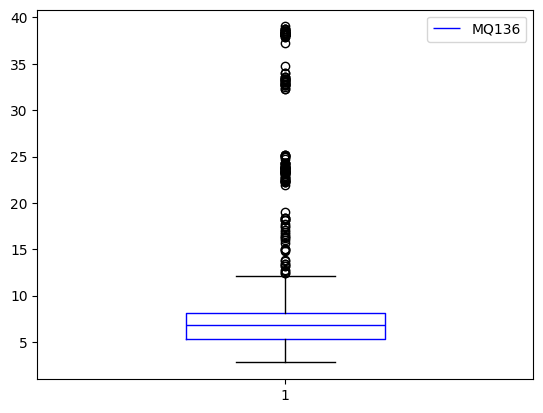

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.boxplot(Xtrain['MQ136'], label='MQ136', medianprops=dict(color='blue'), boxprops=dict(color='blue'), widths=0.4)
plt.legend()
plt.show()

<Axes: ylabel='Frequency'>

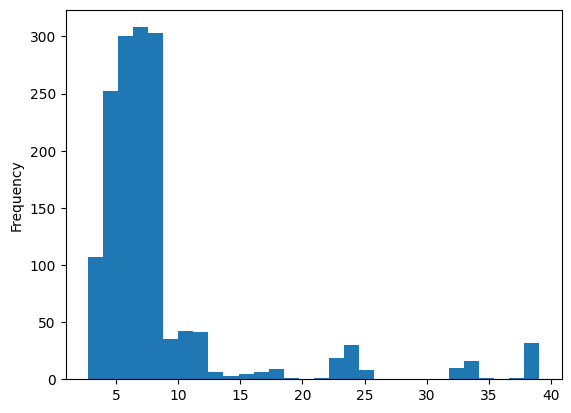

In [14]:
Xtrain.MQ136.plot(kind='hist', bins=30)

Eliminamos los valores atípicos:

In [15]:
import pandas as pd

column_name = 'MQ136'

#  Calcular percentil 25, percentil 75 y IQR
Q1 = Xtrain[column_name].quantile(0.25)
Q3 = Xtrain[column_name].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar extremos atípicos
Xtrain_extremes_process = Xtrain[(Xtrain[column_name] >= lower_bound) & (Xtrain[column_name] <= upper_bound)]
Ytrain_extremes_process = Ytrain[(Xtrain[column_name] >= lower_bound) & (Xtrain[column_name] <= upper_bound)]

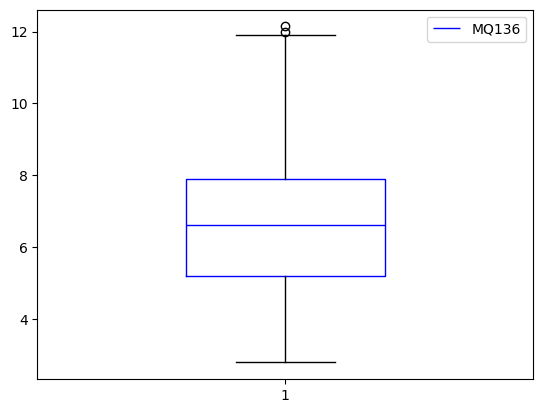

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.boxplot(Xtrain_extremes_process['MQ136'], label='MQ136', medianprops=dict(color='blue'), boxprops=dict(color='blue'), widths=0.4)
plt.legend()
plt.show()

<Axes: ylabel='Frequency'>

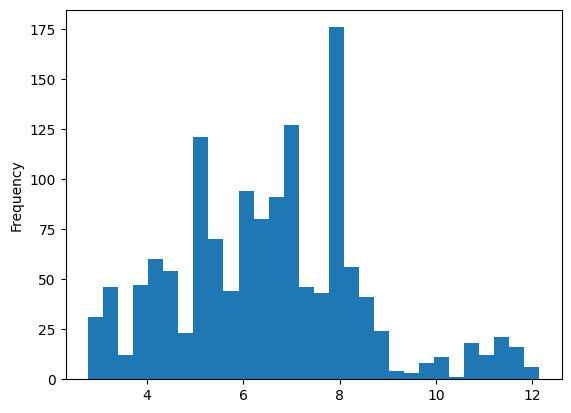

In [17]:
Xtrain_extremes_process.MQ136.plot(kind='hist', bins=30)

Tras el procesado hemos perdido esos datos entre 30 y 40. Sin embargo había una cantidad considerable de datos en ese rango, por lo que podrían no ser extremos aislados.

Veamos como tras el procesado el número de entradas de Good y Excellent en el dataset se reduce bastante, pero no el de Spoiled y Acceptable, por lo que los datos que hemos eliminado eran datos correspondientes a estas primeras etiquetas y no a valores con un comportamiento impredecible que deberíamos ignorar:

In [18]:
print("Apariciones de cada Label antes de eliminar extremos en MQ136:")
print(Ytrain.value_counts())
print()
print("Apariciones de cada Label después de eliminar extremos en MQ136:")
print(Ytrain_extremes_process.value_counts())

Apariciones de cada Label antes de eliminar extremos en MQ136:
Label
Acceptable    384
Excellent     384
Good          384
Spoiled       384
Name: count, dtype: int64

Apariciones de cada Label después de eliminar extremos en MQ136:
Label
Acceptable    384
Spoiled       384
Good          322
Excellent     296
Name: count, dtype: int64


Ahora veamos con el resto de atributos:

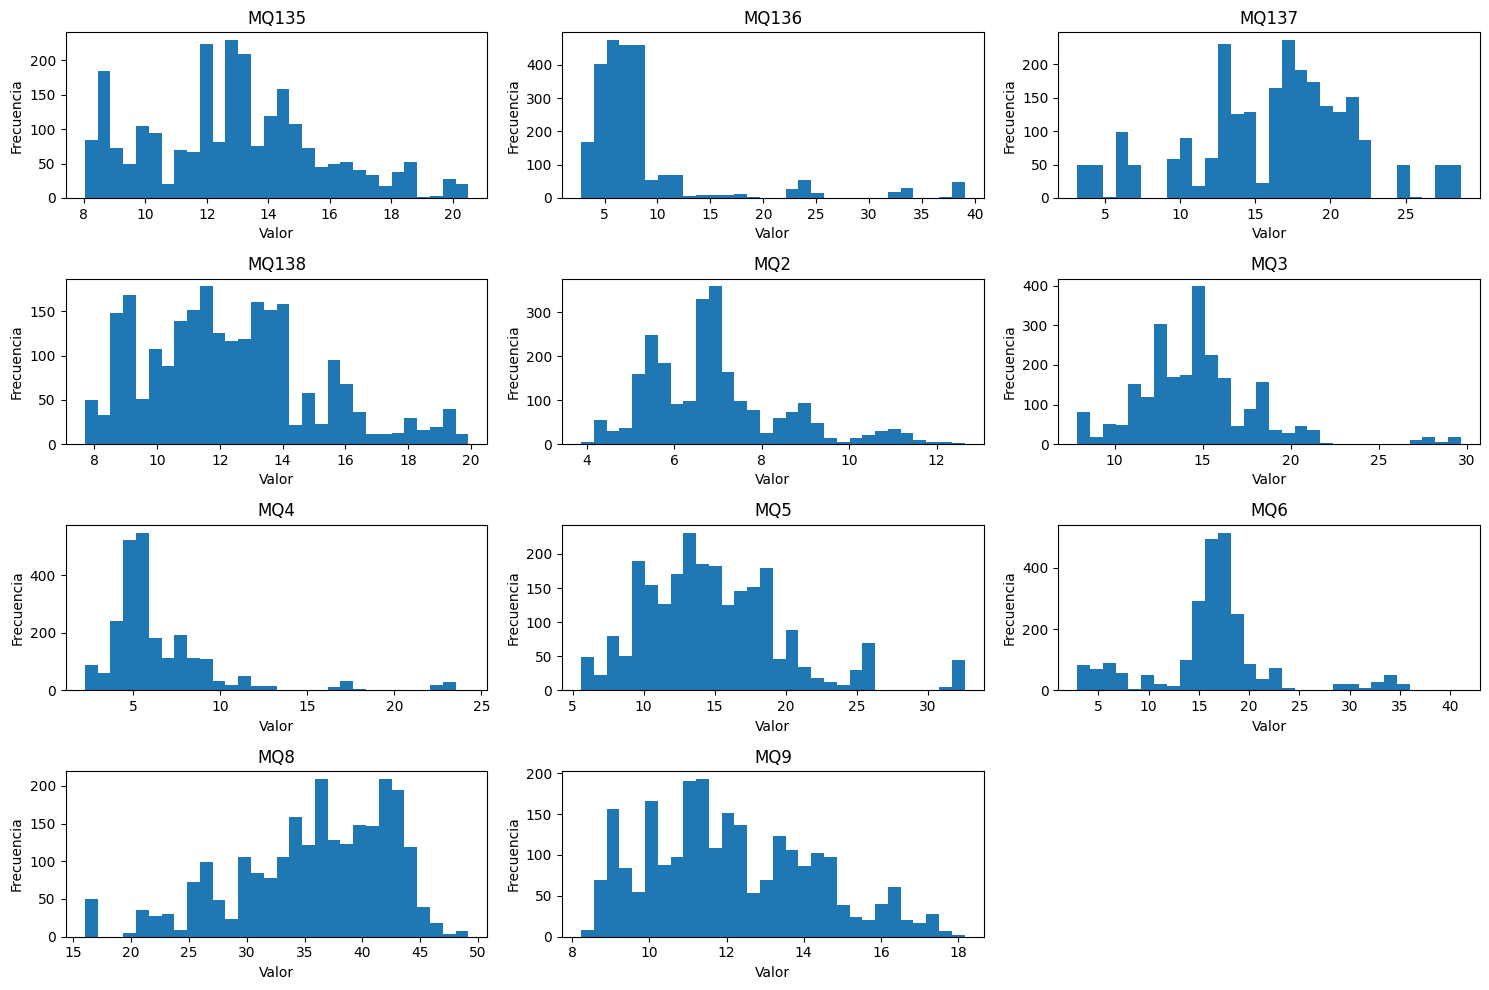

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ['MQ135', 'MQ136', 'MQ137', 'MQ138', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'MQ8', 'MQ9']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')

# Eliminar ejes vacíos si hay menos de 12 columnas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Los atributos que parecen tener valores más aislados que podríamos eliminar son MQ3, MQ4 y MQ6. En primer lugar, veamos MQ3 y MQ4:

In [20]:
import pandas as pd

columns = ['MQ3', 'MQ4']
Xtrain_extremes_process = Xtrain
Ytrain_extremes_process = Ytrain

for column_name in columns:
    #  Calcular percentil 25, percentil 75 y IQR
    Q1 = Xtrain[column_name].quantile(0.25)
    Q3 = Xtrain[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Eliminar extremos atípicos
    Ytrain_extremes_process = Ytrain_extremes_process[(Xtrain_extremes_process[column_name] >= lower_bound) & (Xtrain_extremes_process[column_name] <= upper_bound)]
    Xtrain_extremes_process = Xtrain_extremes_process[(Xtrain_extremes_process[column_name] >= lower_bound) & (Xtrain_extremes_process[column_name] <= upper_bound)]

print("Apariciones de cada Label antes de eliminar extremos en MQ3 y MQ4:")
print(Ytrain.value_counts())
print()
print("Apariciones de cada Label después de eliminar extremos en MQ3 y MQ4:")
print(Ytrain_extremes_process.value_counts())

Apariciones de cada Label antes de eliminar extremos en MQ3 y MQ4:
Label
Acceptable    384
Excellent     384
Good          384
Spoiled       384
Name: count, dtype: int64

Apariciones de cada Label después de eliminar extremos en MQ3 y MQ4:
Label
Acceptable    384
Spoiled       384
Good          363
Excellent     275
Name: count, dtype: int64


Como vemos, la mayoría de valores que acabamos de eliminar corresponden a las etiquetas Good y principalmente Excellent, no a valores distribuidos de forma similar entre todas las etiquetas. Por tanto podemos considerar que son valores importantes que dan información sobre estas 2 etiquetas y no ruido que debemos eliminar.

Repetimos lo mismo pero esta vez con MQ6:

In [21]:
import pandas as pd

columns = ['MQ6']
Xtrain_extremes_process = Xtrain
Ytrain_extremes_process = Ytrain

for column_name in columns:
    #  Calcular percentil 25, percentil 75 y IQR
    Q1 = Xtrain[column_name].quantile(0.25)
    Q3 = Xtrain[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Eliminar extremos atípicos
    Ytrain_extremes_process = Ytrain_extremes_process[(Xtrain_extremes_process[column_name] >= lower_bound) & (Xtrain_extremes_process[column_name] <= upper_bound)]
    Xtrain_extremes_process = Xtrain_extremes_process[(Xtrain_extremes_process[column_name] >= lower_bound) & (Xtrain_extremes_process[column_name] <= upper_bound)]

print("Apariciones de cada Label antes de eliminar extremos en MQ6:")
print(Ytrain.value_counts())
print()
print("Apariciones de cada Label después de eliminar extremos en MQ6:")
print(Ytrain_extremes_process.value_counts())

Apariciones de cada Label antes de eliminar extremos en MQ6:
Label
Acceptable    384
Excellent     384
Good          384
Spoiled       384
Name: count, dtype: int64

Apariciones de cada Label después de eliminar extremos en MQ6:
Label
Acceptable    318
Good          307
Excellent     296
Spoiled       252
Name: count, dtype: int64


Se han eliminado datos de los cuatro estados de carne posible, por lo tanto, posiblemente eran valores aleatorios que no nos dan información y podemos eliminar. Vamos a comprobar que den buen resultado en un modelo:

In [22]:
from sklearn.svm import SVC

svc= SVC()

# Antes de eliminar outliners

svc.fit(Xtrain, Ytrain)
Ytrain_pred= svc.predict(Xtrain)
Yval_pred= svc.predict(Xval)

print('Antes de eliminar outliners')
aciertos_train = 100*np.sum( Ytrain==Ytrain_pred )/len(Ytrain_pred)
aciertos_val = 100*np.sum( Yval==Yval_pred )/len(Yval_pred)
print('Tengo una tasa de aciertos en Ytrain del {} %'.format(aciertos_train))
print('Tengo una tasa de aciertos en Yval del {} %'.format(aciertos_val))

print()

# Después de eliminar outliners

svc.fit(Xtrain_extremes_process, Ytrain_extremes_process)
Ytrain_pred= svc.predict(Xtrain_extremes_process)
Yval_pred= svc.predict(Xval)

print('Después de eliminar outliners')
aciertos_train = 100*np.sum( Ytrain_extremes_process==Ytrain_pred )/len(Ytrain_pred)
aciertos_val = 100*np.sum( Yval==Yval_pred )/len(Yval_pred)
print('Tengo una tasa de aciertos en Ytrain del {} %'.format(aciertos_train))
print('Tengo una tasa de aciertos en Yval del {} %'.format(aciertos_val))

Antes de eliminar outliners
Tengo una tasa de aciertos en Ytrain del 93.03385416666667 %
Tengo una tasa de aciertos en Yval del 96.09375 %

Después de eliminar outliners
Tengo una tasa de aciertos en Ytrain del 91.81585677749361 %
Tengo una tasa de aciertos en Yval del 78.90625 %


Vemos como los resultados tras eliminar los posibles outliners de MQ6 son un poco peores en Ytrain y mucho peores en Yval, bien porque se han eliminado un gran porcentaje de los datos originales y ahora el dataset de entrenamiento es más pequeño, o porque estos valores no eran realmente outliners.

Nos quedaremos con el dataset original sin eliminar entradas.

**Extracción de características**

Vamos a usar la extracción de características para combinar atributos de forma que quede la información más compacta. Comenzamos PCA con 11 componentes, dado que tenemos 11 atributos

In [23]:
from sklearn.decomposition import PCA

pca= PCA(n_components=11)
pca.fit(Xtrain)

print('Componentes obtenidas (de mayor a menor importancia): \n', pca.components_, '\n')
print('Varianza explicada: \n', pca.explained_variance_, '\n')
print('Porcentaje de varianza explicada de cada componentes: \n', pca.explained_variance_/np.sum(pca.explained_variance_), '\n')

Componentes obtenidas (de mayor a menor importancia): 
 [[ 0.10017982  0.51967524 -0.40757234  0.13246626  0.06059336  0.16670898
   0.27150178 -0.36455942 -0.42459209  0.34081956  0.04150277]
 [ 0.21891103 -0.33486977  0.13365909 -0.0244378  -0.01391337  0.28677707
  -0.12969286 -0.19167493  0.31666117  0.7605149   0.08262477]
 [ 0.02861793  0.62740641  0.4290989   0.20609251  0.16243034 -0.12523928
   0.20322738  0.21351761  0.46304912  0.15652523 -0.10520437]
 [-0.10006091 -0.01096845 -0.47088226  0.18906598  0.09822161  0.11199861
   0.0584456  -0.37445257  0.66188786 -0.30762068  0.18396646]
 [ 0.24470529 -0.04496398 -0.10189581  0.52573669  0.00309028  0.52140658
  -0.04274135  0.54096267 -0.08853087 -0.11361114  0.25343386]
 [ 0.57778952 -0.02044937  0.29370025  0.15687566  0.00873652  0.1970286
  -0.08285637 -0.42613047 -0.05255886 -0.34652353 -0.45241723]
 [ 0.50019763 -0.09666426 -0.49613737  0.01759506 -0.09410606 -0.46927875
   0.08517819  0.32448459  0.14601251  0.14786302

Los últimos componentes tiene un porcentaje de varianza explicada bastante bajo, nos quedamos con los 6 primeros, que tiene un porcentaje de varianza explicada superior a 0.02.

In [24]:
from sklearn.decomposition import PCA

pca= PCA(n_components=6)
pca.fit(Xtrain)

print('Componentes obtenidas (de mayor a menor importancia): \n', pca.components_, '\n')
print('Varianza explicada: \n', pca.explained_variance_, '\n')
print('Porcentaje de varianza explicada de cada componentes: \n', pca.explained_variance_/np.sum(pca.explained_variance_), '\n')

Componentes obtenidas (de mayor a menor importancia): 
 [[ 0.10017982  0.51967524 -0.40757234  0.13246626  0.06059336  0.16670898
   0.27150178 -0.36455942 -0.42459209  0.34081956  0.04150277]
 [ 0.21891103 -0.33486977  0.13365909 -0.0244378  -0.01391337  0.28677707
  -0.12969286 -0.19167493  0.31666117  0.7605149   0.08262477]
 [ 0.02861793  0.62740641  0.4290989   0.20609251  0.16243034 -0.12523928
   0.20322738  0.21351761  0.46304912  0.15652523 -0.10520437]
 [-0.10006091 -0.01096845 -0.47088226  0.18906598  0.09822161  0.11199861
   0.0584456  -0.37445257  0.66188786 -0.30762068  0.18396646]
 [ 0.24470529 -0.04496398 -0.10189581  0.52573669  0.00309028  0.52140658
  -0.04274135  0.54096267 -0.08853087 -0.11361114  0.25343386]
 [ 0.57778952 -0.02044937  0.29370025  0.15687566  0.00873652  0.1970286
  -0.08285637 -0.42613047 -0.05255886 -0.34652353 -0.45241723]] 

Varianza explicada: 
 [124.61722555  48.88070112  17.53386371  11.92314661   9.02039011
   7.0231383 ] 

Porcentaje de v

Transformamos los datos X a las nuevas componentes. Vemos que se reduce el número de columnas.

In [25]:
Xtrain_pca= pca.transform(Xtrain)
Xval_pca= pca.transform(Xval)
print('Transformación de datos iniciales Xtrain de tamaño', Xtrain.shape, ' a Xtrain_pca de tamaño', Xtrain_pca.shape)

Transformación de datos iniciales Xtrain de tamaño (1536, 11)  a Xtrain_pca de tamaño (1536, 6)


Vemos los resultados obtenidos. Obtenemos una tasa de aciertos del 95.5 % para train y 98 % para validación, por lo que es bastante preciso a pesar de utilizar solo 6 componentes de input.

In [26]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(Xtrain_pca, Ytrain)
Ytrain_pred= svc.predict(Xtrain_pca)
Yval_pred= svc.predict(Xval_pca)

# Resultados
aciertos_train = 100*np.sum( Ytrain==Ytrain_pred )/len(Ytrain_pred)
aciertos_val = 100*np.sum( Yval==Yval_pred )/len(Yval_pred)
print('Tengo una tasa de aciertos en Ytrain del {} %'.format(aciertos_train))
print('Tengo una tasa de aciertos en Yval del {} %'.format(aciertos_val))

Tengo una tasa de aciertos en Ytrain del 95.5078125 %
Tengo una tasa de aciertos en Yval del 98.17708333333333 %


**Selección de características**

Vamos a realizar una selección de características para escoger los atributos que mejor nos permiten predecir las variables de salida, y ver si dan buen resultado.

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

y = df['Label']
y_enc= LabelEncoder().fit_transform(y)

Seleccionamos los 7 mejores atributos con SelectKBest:

In [28]:
from sklearn.feature_selection import SelectKBest, chi2

skb= SelectKBest(score_func = chi2, k=7)
skb.fit(Xtrain, Ytrain)
Xtrain_final= skb.transform(Xtrain)
Xval_final= skb.transform(Xval)
print('La selección de características me da el conjunto Xtrain_final:\n{}\n[...]'.format(Xtrain_final[0]))

La selección de características me da el conjunto Xtrain_final:
[ 4.39 13.14 11.26 13.35  4.66 15.37 19.61]
[...]


Podemos ver que los atributos que se han seleccionado son MQ136, MQ137, MQ138, MQ3, MQ4, MQ5 y MQ6, ya que vemos que coinciden los valores de las columnas:

In [29]:
Xtrain.head(1)

,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9
505,9.82,4.39,13.14,11.26,7.49,13.35,4.66,15.37,19.61,25.69,14.11


Predecimos usando SVC a partir de los atributos seleccionados:

In [30]:
# Predicción de y a partir de X_pca usando SVC
from sklearn.svm import SVC
svc= SVC()
svc.fit(Xtrain_final, Ytrain)
Ytrain_pred= svc.predict(Xtrain_final)
Yval_pred= svc.predict(Xval_final)

# Resultados
aciertos_train = 100*np.sum( Ytrain==Ytrain_pred )/len(Ytrain_pred)
aciertos_val = 100*np.sum( Yval==Yval_pred )/len(Yval_pred)
print('Tengo una tasa de aciertos en Ytrain del {} %'.format(aciertos_train))
print('Tengo una tasa de aciertos en Yval del {} %'.format(aciertos_val))

Tengo una tasa de aciertos en Ytrain del 92.578125 %
Tengo una tasa de aciertos en Yval del 92.44791666666667 %


Obtenemos resultados aceptables, un 92 % y 92 %, aunque no perfectos ya que estamos limitando el número de atributos usados en el modelo.

Volvemos a probar con más atributos, en este caso con 10:

In [31]:
from sklearn.feature_selection import SelectKBest, chi2

skb= SelectKBest(score_func = chi2, k=10)
skb.fit(Xtrain, Ytrain)
Xtrain_final= skb.transform(Xtrain)
Xval_final= skb.transform(Xval)

# Predicción de y a partir de X_pca usando SVC
from sklearn.svm import SVC
svc= SVC()
svc.fit(Xtrain_final, Ytrain)
Ytrain_pred= svc.predict(Xtrain_final)
Yval_pred= svc.predict(Xval_final)

# Resultados
aciertos_train = 100*np.sum( Ytrain==Ytrain_pred )/len(Ytrain_pred)
aciertos_val = 100*np.sum( Yval==Yval_pred )/len(Yval_pred)
print('Tengo una tasa de aciertos en Ytrain del {} %'.format(aciertos_train))
print('Tengo una tasa de aciertos en Yval del {} %'.format(aciertos_val))

Tengo una tasa de aciertos en Ytrain del 92.44791666666667 %
Tengo una tasa de aciertos en Yval del 94.27083333333333 %


Obtenemos resultados un poco mejores, 92 % y 94 %, sin embargo eran mejores los de PCA.

**Elección entre extracción y selección de características**

Vemos que los resultados obtenidos son mejores con PCA, por lo que es lo que vamos a usar.

Sin embargo, vamos a reducir el número de componentes bastante, a 4, ya que aunque ahora los resultados sean un poco peores, van a ser suficientes para obtener buenos resultados con los modelos que veremos después.

In [32]:
from sklearn.decomposition import PCA

pca= PCA(n_components=4)
pca.fit(Xtrain)

print('Varianza explicada: \n', pca.explained_variance_, '\n')
print('Porcentaje de varianza explicada de cada componentes: \n', pca.explained_variance_/np.sum(pca.explained_variance_), '\n')

Xtrain_pca= pca.transform(Xtrain)
Xval_pca= pca.transform(Xval)
print('Transformación de datos iniciales Xtrain de tamaño', Xtrain.shape, ' a Xtrain_pca de tamaño', Xtrain_pca.shape)

from sklearn.svm import SVC

svc= SVC()
svc.fit(Xtrain_pca, Ytrain)
Ytrain_pred= svc.predict(Xtrain_pca)
Yval_pred= svc.predict(Xval_pca)

# Resultados
aciertos_train = 100*np.sum( Ytrain==Ytrain_pred )/len(Ytrain_pred)
aciertos_val = 100*np.sum( Yval==Yval_pred )/len(Yval_pred)
print('Tengo una tasa de aciertos en Ytrain del {} %'.format(aciertos_train))
print('Tengo una tasa de aciertos en Yval del {} %'.format(aciertos_val))

Varianza explicada: 
 [124.61722555  48.88070112  17.53386371  11.92314661] 

Porcentaje de varianza explicada de cada componentes: 
 [0.61401426 0.2408451  0.08639289 0.05874775] 

Transformación de datos iniciales Xtrain de tamaño (1536, 11)  a Xtrain_pca de tamaño (1536, 4)
Tengo una tasa de aciertos en Ytrain del 88.41145833333333 %
Tengo una tasa de aciertos en Yval del 88.02083333333333 %


Confirmamos y guardamos la transformación:

In [33]:
Xtrain = pd.DataFrame(Xtrain_pca)
Xval = pd.DataFrame(Xval_pca)


**Estandarización**

Vemos como cada las desviaciones típicas de los atributos de entrada son diferentes, por lo que vamos a realizar una estandarización, de forma que mejore la precisión y velocidad de los modelos:

In [34]:
Xtrain.describe()

,0,1,2,3
count,1.536000e+03,1.536000e+03,1.536000e+03,1.536000e+03
mean,9.621933e-16,-4.385381e-15,-4.406198e-15,-1.191177e-15
std,1.116321e+01,6.991473e+00,4.187346e+00,3.452991e+00
min,-2.810098e+01,-1.707288e+01,-7.722451e+00,-8.787459e+00
25%,-5.065742e+00,-4.506059e+00,-2.679575e+00,-2.981373e+00
50%,-1.066619e+00,2.343754e+00,-5.051039e-01,5.755477e-02
75%,3.916452e+00,4.944526e+00,1.708259e+00,2.027938e+00
max,3.998826e+01,1.411272e+01,1.264959e+01,1.360597e+01


In [35]:
from sklearn.preprocessing import StandardScaler

# Estandarización (normalización de datos con media 0 y std 1)
se = StandardScaler()
se.fit(Xtrain)

Xtrain_transformed = se.transform(Xtrain)
Xval_transformed = se.transform(Xval)

# Convertimos de nuevo a DataFrame y guardamos el resultado
Xtrain = pd.DataFrame(Xtrain_transformed, columns=Xtrain.columns)
Xval = pd.DataFrame(Xval_transformed, columns=Xval.columns)

Vemos como han quedados los datos normalizados con igual std:

In [36]:
Xtrain.describe()

,0,1,2,3
count,1.536000e+03,1.536000e+03,1.536000e+03,1.536000e+03
mean,-2.312965e-18,-2.312965e-17,-1.156482e-17,-1.734723e-18
std,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00
min,-2.518105e+00,-2.442752e+00,-1.844836e+00,-2.545712e+00
25%,-4.539369e-01,-6.447177e-01,-6.401305e-01,-8.636987e-01
50%,-9.557882e-02,3.353395e-01,-1.206656e-01,1.667352e-02
75%,3.509500e-01,7.074527e-01,4.080902e-01,5.874902e-01
max,3.583314e+00,2.019219e+00,3.021894e+00,3.941626e+00


**Codificación de datos**

Transformamos los datos categóricos o strings que forman los valores de la variable de salida a valores numéricos para que puedan ser interpretados por los modelos:

In [37]:
# Transformación con LabelEncoder

Label_original = Ytrain.unique()

le = LabelEncoder()
le.fit(Ytrain)
Ytrain, Yval = le.transform(Ytrain), le.transform(Yval)
print('Los datos categóricos \n', Label_original, '\nhan sido transformados a ordinales con LabelEncoder:\n', np.unique(Ytrain))

Los datos categóricos 
 ['Acceptable' 'Excellent' 'Good' 'Spoiled'] 
han sido transformados a ordinales con LabelEncoder:
 [0 1 2 3]


In [38]:
print(Ytrain)

[0 1 2 ... 1 1 2]


## 1.3.2 Métricas de evaluación del rendimiento

Vamos a usar las siguientes métricas para evaluar el rendimiento los modelos usando los valores y reales e y predecidos:

- **Accuracy**. Tasa de aciertos total.

  $Acc={\#Aciertos\over{\#Totales}}$.

- **Precision**. Tasa de aciertos entre los predichos como positivos.

  $Precision={{\#AciertosPositivos}\over{\#AciertosPositivos+\#FallosNegativos}}$.

- **Recall**. Tasa de aciertos entre los reales positivos.

  $Recall= {{\#AciertosPositivos}\over{\#AciertosPositivos+\#FallosPositivos}}$.

- **F1-Score**. Métrica que agrupa la precisión y el recall.

  $F_1= 2{{Precision\cdot Recall}\over{Precision+Recall}}$.

Vamos a crear una función que nos permita utilizar fácilmente todas las métricas:

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calcular_metricas(y_true, y_pred):
    metricas= {
        'Accuracy' : accuracy_score,
        'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
        'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
        'f1-score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro')
    }

    for metrica in metricas:
        f_metrica= metricas[metrica]
        valor= f_metrica(y_true= y_true, y_pred= y_pred)
        print(metrica, ': ', valor)

## 1.4 Selección de modelos de aprendizaje automático

<u>**SVM (Support Vector Machine): SVC (Support Vector Classification)**</u>

Vamos a utilizar el kernel RBF (Radial Basis Function Kernel) de SVC, el cual utiliza el kernel lineal, por lo que vamos a explicar primero este último:

**SVC lineal**: Busca separar clases linealmente separables, manteniéndose lo más alejado posible de las instancias más cercanas. Intenta crear la "calle" más ancha posible, manteniedo todas las instancias fuera de esta (margen duro) o limitando el número de estas (margen blando). Este modelo lineal es adecuado para datos que se pueden separar linealmente (pero para este dataset, tanto SVC lineal como LinealRegression dan malos resultados, por lo que seguramente estamos ante datos no separables linealmente).

<img src="https://databasecamp.de/wp-content/uploads/svm.png" style="max-width: 600px; width: 50%;">

**SVC con kernel RBF (Radial Basis Function Kernel)**: El kernel trasforma los datos originales a datos en un espacio de mayor número de dimensiones, de tal forma que en este nuevo espacio sean linealmente separables por un hiperplano.

Para proyectar los datos a un espacio de mayor dimensión, el núcleo de RBF utiliza la función de base radial, que calcula la similaridad entre cada dos puntos:

$ 
K(X_1, X_2) = e^{-\frac{||X_1-X_2||^2}{2σ^2}}
$

Se puede simplificar con $ ℽ = \frac{1}{2σ^2} $, de forma que queda:

$
K(X_1, X_2) = e^{-ℽ||X_1-X_2||^2}
$

Parámetros:

* ℽ: Se debe encontrar el valor adecuado de ℽ para obtener un buen rendimiento. Un valor gamma mayor hace que la función tenga más picos y un límite de decisión más complejo, lo que puede causar overfitting, mientras que un valor gamma bajo da lugar a un límite de decisión más suave y a un modelo más generalizable a nuevos datos.
* C: Es el parámetro de regularización, utilizado para prevenir el sobreajuste del modelo a los datos de entrenamiento. Cuanto menor es C, mayor es la tolerancia a la clasificación errónea y por tanto generaliza mejor, y cuanto mayor es C, menor es la tolerancia.
* decision_function_shape: Permite elegir entre One-vs-One (se entrena un modelo por cada dos clases para predecir a cual es más probable que pertenezca) y One-vs-Rest (se entrena un clasificador binario por cada clase que dice la probabilidad de que pertenezca a esta). Usaremos One-vs-Rest, que es el valor por defecto de la función.

<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEidwnlkQ36EMMfIwJl_cRpfwmQDYIQ2MzAxAU5qfSld_UzE6-zGVN7pRO8X_d3SrjW9IrzZIJwjcsC57C1y7KezJzADzPptxvgVJFXTYnnRi5ZzK2SWQrPbnk-UH4XEZVo8V80JW4gYV9RMAHfvK8AWfl5KtLutQxYKg3R9-MlvG_hqXVJJYmXWGqusNw/w507-h247/svm_kernels%20intro%20(1).png
" style="max-width: 600px; width: 50%;">



Referencias:
* https://www.pycodemates.com/2022/10/the-rbf-kernel-in-svm-complete-guide.html
* https://vitalflux.com/svm-rbf-kernel-parameters-code-sample/

<u>**K-Nearest Neighbors**</u>

KNN es un modelo basado en instancias, es decir, aprende los ejemplos de memoria y generaliza a nuevos casos compararlos con los ejemplos aprendidos.

Para clasificar un nuevo punto, calcula la distancia (podemos elegir que distancia va a usar) entre este punto y todos los puntos de entrenamiento. Selecciona los k vecinos más cercanos y asigna al nuevo punto la clase más común entre los vecinos seleccionados.

Hiperparámetros:
* n_neighbors: Número de vecinos más cercanos que se tendrán en cuenta para predecir el valor de un nuevo punto. Un valor bajo puede hacer que el modelo sea más sensible al ruido.
* weights: Determina cómo se ponderan los vecinos al hacer la predicción. Si es 'uniform' todos los vecinos tendrán el mismo peso en la decisión, y si es 'distance' los más cercanos tendrán un mayor peso.
* metric: Especifica el tipo de distancia que se usará. Podemos usar la distancia euclídea, que es la más común, la distancia manhattan, o la distancia minkowski (con diferentes valores de p).

  La distancia euclídea equivale a minkowski con p=2, y la distancia manhattan a minkowski con p=1.

  Distancia de Minkowski:
  $
  D(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
  $
  .

<u>**Bagging**</u>

Consiste en utilizar un mismo algoritmo para varios predictores, pero entrenándolos en subconjuntos aleatorios diferentes del conjunto de entrenamiento.

Una vez se han entrenado todos los predictores, este ensemble realiza las predicciones para nuevas instancias agregando las predicciones de todos los predictores (usando la moda estadística en el caso de clasificación).

Cada predictor individual tiene un sesgo mayor que el modelo original, pero la agregación permite reducir tanto el sesgo como la varianza.

Si el muestreo se realiza con sustitución el método se denomina
bagging (bootstrap aggregating), mientras que si el muestreo se realiza sin reemplazo, se denomina pasting.


Hiperparámetros:
* bootstrap: Permite utilizar un muestreo con reemplazo (con el valor True, en este caso será un modelo bagging) para crear diferentes subconjuntos del conjunto de datos original, o muestreo sin reemplazo para crear las muestras de entrenamiento (valor False, en este caso será un modelo pasting). Como queremos entrenar un modelo bagging el valor será True.
* oob_score: Los ejemplos que no se utilizan en un subconjunto específico se denominan out-of-bag (OOB). El oob_score permite evaluar el rendimiento del modelo con estos ejemplos OOB. En este caso no lo usaremos, lo dejaremos a False.
* n_estimators: Es el número de estimadores que utilizará el modelo. Aumentar el número de estimadores puede mejorar la estabilidad y la precisión del modelo al reducir la varianza y evitar el sobreajuste.
* max_samples: Especifica la fracción de muestras que se utilizarán para entrenar cada estimador en el ensemble.
* max_features: Especifica la fracción de características que se utilizarán para entrenar cada estimador.

Otros parámetros:
* n_jobs: El valor -1 permite utilizar todos los núcleos de CPU en paralelo. Esta es una de las ventajas del bagging, que permite ejecutar los predictores en paralelo.

## 1.5 Selección de hiperparámetros

<u>**SVM (Support Vector Machine): SVC (Support Vector Classification)**</u>

Para encontrar los mejores hiperparámetros vamos a utilizar GridSearchCV.

Esta es una herramienta que permite la búsqueda de los mejores hiperparámetros. Prueba todas las combinaciones posibles de un conjunto de parámetros y evalúa el rendimiento de cada combinación utilizando validación cruzada, maximizando la métrica de evaluación que seleccionemos, en este caso accuracy.

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definimos el modelo
model_SVC = SVC(kernel='rbf', decision_function_shape='ovr')

# Definir el rango de parámetros a buscar
param_grid = {
    'C': [0.01, 0.1, 0.5, 1, 5, 10, 20],
    'gamma': [0.01, 0.1, 0.5, 1, 5, 10, 20]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model_SVC, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Ajustamos el modelo
grid_search.fit(Xtrain, Ytrain)

# Mostramos los mejores parámetros
print()
print("Mejores parámetros:", grid_search.best_params_)

# Evaluamos el modelo con los mejores parámetros
Ytrain_pred = grid_search.best_estimator_.predict(Xtrain)
Yval_pred = grid_search.best_estimator_.predict(Xval)

# Mostramos métricas
print()
print("Ytrain:\n")
calcular_metricas(Ytrain, Ytrain_pred)
print()
print("Yval:\n")
calcular_metricas(Yval, Yval_pred)

Fitting 5 folds for each of 49 candidates, totalling 245 fits

Mejores parámetros: {'C': 10, 'gamma': 10}

Ytrain:

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1-score :  1.0

Yval:

Accuracy :  0.9895833333333334
Precision :  0.99
Recall :  0.9895833333333333
f1-score :  0.9896348012889365


Los mejores hiperparámetros han sido C=10 (el modelo dará más importancia a clasificar correctamente todos los puntos de entrenamiento y menos a la generalización)  y gamma=10 (el modelo es más complejo y ajustado a los datos).

Los dos parámetros toman valores que pueden causar overfitting, sin embargo obtenemos buenos resultados en validación, como vemos a continuación:

Ytrain:

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1-score :  1.0

Yval:

Accuracy :  0.9895833333333334
Precision :  0.99
Recall :  0.9895833333333333
f1-score :  0.9896348012889365


Text(0, 0.5, 'Yval')

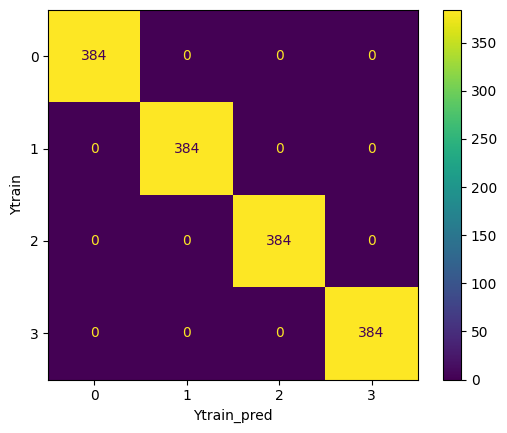

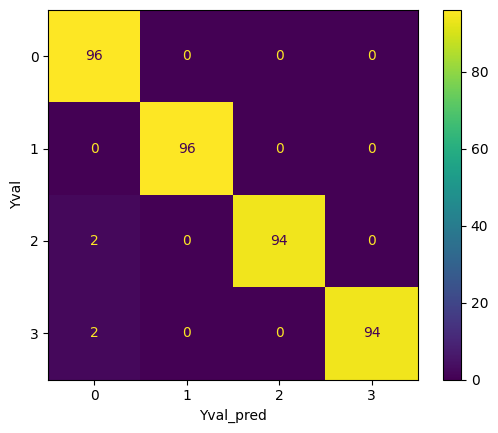

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Definimos el modelo
model_SVC = SVC(
    kernel='rbf',
    decision_function_shape='ovr',
    C=10.0,
    gamma=10.0
)
 
# Entrenamos el modelo
model_SVC.fit(Xtrain, Ytrain)

# Predecimos
Ytrain_pred = model_SVC.predict(Xtrain)
Yval_pred = model_SVC.predict(Xval)

# Mostramos métricas y Confusion Matrix
print("Ytrain:\n")
calcular_metricas(Ytrain, Ytrain_pred)
print()
print("Yval:\n")
calcular_metricas(Yval, Yval_pred)

ConfusionMatrixDisplay(confusion_matrix(Ytrain, Ytrain_pred)).plot();
plt.xlabel('Ytrain_pred')
plt.ylabel('Ytrain')

ConfusionMatrixDisplay(confusion_matrix(Yval, Yval_pred)).plot();
plt.xlabel('Yval_pred')
plt.ylabel('Yval')

Obtenemos métricas perfectas en entrenamiento y muy altas en validación.

<u>**K-Nearest Neighbors**</u>

Utilizamos GridSearchCV para encontrar los mejores hiperparámetros:

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definimos el modelo
model_KNN = KNeighborsClassifier()

# Definir el rango de parámetros a buscar
param_grid = {
    'n_neighbors': [1,3,5],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1.5, 3]  # Valores de p para la distancia de Minkowski
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model_KNN, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Ajustamos el modelo
grid_search.fit(Xtrain, Ytrain)

# Mostramos los mejores parámetros
print()
print("Mejores parámetros:", grid_search.best_params_)

# Evaluamos el modelo con los mejores parámetros
Ytrain_pred = grid_search.best_estimator_.predict(Xtrain)
Yval_pred = grid_search.best_estimator_.predict(Xval)

# Mostramos métricas
print()
print("Ytrain:\n")
calcular_metricas(Ytrain, Ytrain_pred)
print()
print("Yval:\n")
calcular_metricas(Yval, Yval_pred)

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 1, 'p': 1.5, 'weights': 'uniform'}

Ytrain:

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1-score :  1.0

Yval:

Accuracy :  0.9973958333333334
Precision :  0.9974226804123711
Recall :  0.9973958333333334
f1-score :  0.997395762688875


Obtenemos muy buenos resultados con los parámetros seleccionados.

Para comparar con el resto, vemos los resultados con las otras combinaciones de parámetros:

In [43]:
import pandas as pd

results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['params', 'mean_test_score']])

                                               params  mean_test_score
0   {'metric': 'minkowski', 'n_neighbors': 1, 'p':...         0.990239
1   {'metric': 'minkowski', 'n_neighbors': 1, 'p':...         0.990239
2   {'metric': 'minkowski', 'n_neighbors': 1, 'p':...         0.990241
3   {'metric': 'minkowski', 'n_neighbors': 1, 'p':...         0.990241
4   {'metric': 'minkowski', 'n_neighbors': 3, 'p':...         0.981124
5   {'metric': 'minkowski', 'n_neighbors': 3, 'p':...         0.985680
6   {'metric': 'minkowski', 'n_neighbors': 3, 'p':...         0.980475
7   {'metric': 'minkowski', 'n_neighbors': 3, 'p':...         0.983728
8   {'metric': 'minkowski', 'n_neighbors': 5, 'p':...         0.975915
9   {'metric': 'minkowski', 'n_neighbors': 5, 'p':...         0.979819
10  {'metric': 'minkowski', 'n_neighbors': 5, 'p':...         0.978519
11  {'metric': 'minkowski', 'n_neighbors': 5, 'p':...         0.981774
12  {'metric': 'euclidean', 'n_neighbors': 1, 'p':...         0.990888
13  {'

Con todos se obtienen buenos resultados, pero vemos como los mejores son con euclidean 1 neighbor.

Tomamos euclidean 1 neighbor, sin tener en cuenta el tipo de weight, ya que al calcular con un solo vecino no hace falta calcular el peso entre ellos, ni p, ya que es un parámetro que se usa solo para la distancia de mikowski.

Ytrain:

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1-score :  1.0

Yval:

Accuracy :  0.9973958333333334
Precision :  0.9974226804123711
Recall :  0.9973958333333334
f1-score :  0.997395762688875


Text(0, 0.5, 'Yval')

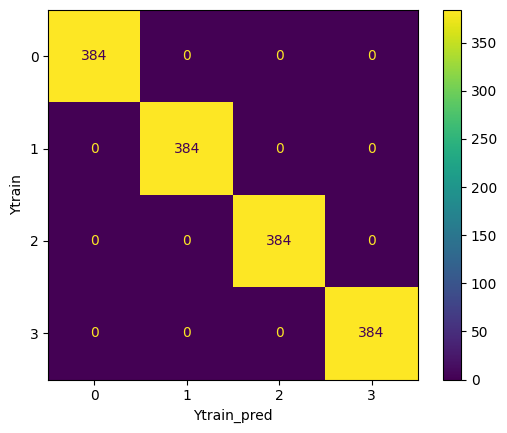

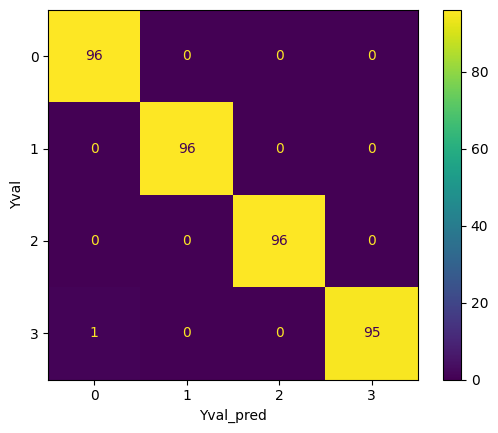

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Definimos el modelo
model_KNN = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# Entrenamos el modelo
model_KNN.fit(Xtrain, Ytrain)

# Predecimos
Ytrain_pred = model_KNN.predict(Xtrain)
Yval_pred = model_KNN.predict(Xval)

# Mostramos métricas y Confusion Matrix
print("Ytrain:\n")
calcular_metricas(Ytrain, Ytrain_pred)
print()
print("Yval:\n")
calcular_metricas(Yval, Yval_pred)

ConfusionMatrixDisplay(confusion_matrix(Ytrain, Ytrain_pred)).plot();
plt.xlabel('Ytrain_pred')
plt.ylabel('Ytrain')

ConfusionMatrixDisplay(confusion_matrix(Yval, Yval_pred)).plot();
plt.xlabel('Yval_pred')
plt.ylabel('Yval')

Vemos como ha obtenido métricas perfectas en el set de entrenamiento. Esto se debe a que como solo tenemos en cuenta 1 vecino más cercano y para cada punto ese vecino es él mismo, siempre dará el valor correcto.

En el test de validación obtenemos muy buenos resultados, con un solo dato mal clasificado. Esto puede deberse a que los datos de clases iguales son cercanos entre sí y hay poco ruido.

<u>**Bagging**</u>

Utilizamos GridSearchCV para encontrar los mejores hiperparámetros, con el modelo base SVC con los parámetros que hemos utilizado anteriormente:

In [45]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definimos el modelo
base_model = SVC(
    kernel='rbf',
    decision_function_shape='ovr',
    C=10.0,
    gamma=10.0
)
model_bagging = BaggingClassifier(
    estimator=base_model,
    random_state=123,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1
)

# Definir el rango de parámetros a buscar
param_grid = {
    'n_estimators': [10, 20, 50],
    'max_samples': [0.7, 0.8, 1.0],
    'max_features': [0.7, 0.8, 1.0]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model_bagging, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Ajustamos el modelo
grid_search.fit(Xtrain, Ytrain)

# Mostramos los mejores parámetros
print()
print("Mejores parámetros:", grid_search.best_params_)

# Evaluamos el modelo con los mejores parámetros
Ytrain_pred = grid_search.best_estimator_.predict(Xtrain)
Yval_pred = grid_search.best_estimator_.predict(Xval)

# Mostramos métricas
print()
print("Ytrain:\n")
calcular_metricas(Ytrain, Ytrain_pred)
print()
print("Yval:\n")
calcular_metricas(Yval, Yval_pred)

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Mejores parámetros: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20}

Ytrain:

Accuracy :  0.9993489583333334
Precision :  0.9993506493506493
Recall :  0.9993489583333334
f1-score :  0.9993489572295418

Yval:

Accuracy :  0.9921875
Precision :  0.9924242424242424
Recall :  0.9921875
f1-score :  0.9922133666829176


Hemos obtenido muy buenos resultados con los parámetros {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20}, casi perfectos tanto para los datos de entrenamiento como de validación.

Vamos a crear el modelo con estos parámetros y a compararlo con el SVC original:

Ytrain (Base model):

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1-score :  1.0

Yval (Base model):

Accuracy :  0.9895833333333334
Precision :  0.99
Recall :  0.9895833333333333
f1-score :  0.9896348012889365


Ytrain (Bagging):

Accuracy :  0.9993489583333334
Precision :  0.9993506493506493
Recall :  0.9993489583333334
f1-score :  0.9993489572295418

Yval (Bagging):

Accuracy :  0.9921875
Precision :  0.9924242424242424
Recall :  0.9921875
f1-score :  0.9922133666829176


Text(0, 0.5, 'Yval')

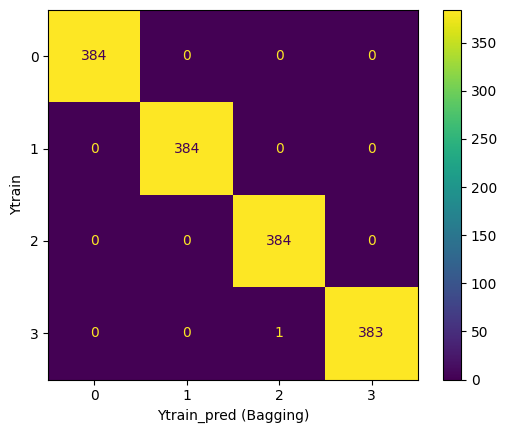

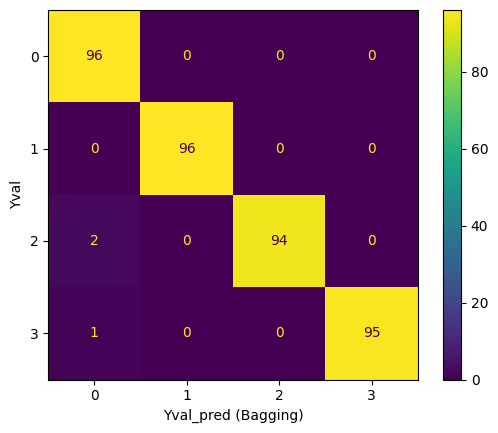

In [46]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

# Modelo base
base_model = SVC(
    kernel='rbf',
    decision_function_shape='ovr',
    C=10.0,
    gamma=10.0
)

# Definimos el modelo Bagging
model_bagging = BaggingClassifier(
    estimator=base_model,
    random_state=123,
    bootstrap=True,
    oob_score=False,
    n_estimators=20,
    max_samples=1.0,
    max_features=1.0
)

# Ajustar el modelo de Bagging a los datos de entrenamiento
model_bagging.fit(Xtrain, Ytrain)

# Hacer predicciones en el conjunto de prueba
Ytrain_pred = model_bagging.predict(Xtrain)
Yval_pred = model_bagging.predict(Xval)

# Para comparar también calculamos con el original sin Bagging
base_model.fit(Xtrain, Ytrain)
Ytrain_base_model_pred = base_model.predict(Xtrain)
Yval_base_model_pred = base_model.predict(Xval)

# Mostramos métricas y Confusion Matrix
print("Ytrain (Base model):\n")
calcular_metricas(Ytrain, Ytrain_base_model_pred)
print()
print("Yval (Base model):\n")
calcular_metricas(Yval, Yval_base_model_pred)

print()
print()

print("Ytrain (Bagging):\n")
calcular_metricas(Ytrain, Ytrain_pred)
print()
print("Yval (Bagging):\n")
calcular_metricas(Yval, Yval_pred)

ConfusionMatrixDisplay(confusion_matrix(Ytrain, Ytrain_pred)).plot();
plt.xlabel('Ytrain_pred (Bagging)')
plt.ylabel('Ytrain')

ConfusionMatrixDisplay(confusion_matrix(Yval, Yval_pred)).plot();
plt.xlabel('Yval_pred (Bagging)')
plt.ylabel('Yval')

Aunque en el conjunto de entrenamiento han bajado un poco las métricas ya que no son perfectas como en el modelo SVC original, vemos como en el set de validación, los resultados han mejorado de aproximadamente el 98 % al 99 %, es decir, hemos conseguido que generalize mejor al aplicar bagging.

## 1.6 Estimación del error fuera de la muestra

En primer lugar debemos aplicar el preprocesamiento de datos a Xtest e Ytest, sin crear modelos nuevos de PCA, estandarización y LabelEncoder, es decir, usando los que ya teníamos:

In [47]:
# PCA
Xtest = pd.DataFrame(pca.transform(Xtest))

# Estandarización
Xtest = pd.DataFrame(se.transform(Xtest), columns=Xtest.columns)

# Transformación con LabelEncoder
Ytest = le.transform(Ytest)


Combinamos los datos de entrenamiento más validación para entrenar de nuevo los modelos con todos los datos disponibles, y entonces probar con los datos de test:

In [48]:
Xcombined = pd.concat([Xtrain, Xval], ignore_index=True)
Ycombined = np.concatenate((Ytrain, Yval))

<u>**SVM (Support Vector Machine): SVC (Support Vector Classification)**</u>

Ytest:

Accuracy :  0.9875
Precision :  0.9875821142843247
Recall :  0.9875
f1-score :  0.9874817740516322


Text(0, 0.5, 'Ytest')

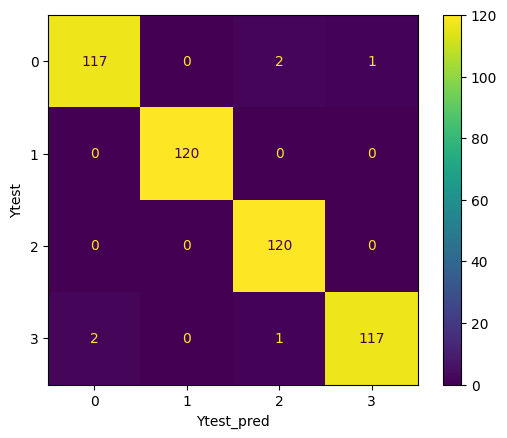

In [49]:
# Entrenamos el modelo con todos los datos de entrenamiento más validación
model_SVC.fit(Xcombined, Ycombined)

# Predecimos
Ytest_pred = model_SVC.predict(Xtest)

# Mostramos métricas y Confusion Matrix
print("Ytest:\n")
calcular_metricas(Ytest, Ytest_pred)

ConfusionMatrixDisplay(confusion_matrix(Ytest, Ytest_pred)).plot();
plt.xlabel('Ytest_pred')
plt.ylabel('Ytest')

Obtenemos muy buenos resultados con SVC con kernel rbf, casi un 99 % en todas las métricas. Ya obteníamos buenos resultados con Yval, por lo que generaliza bien, así que era esperable obtener resultados similares con Ytest.

<u>**K-Nearest Neighbors**</u>

Ytest:

Accuracy :  0.9916666666666667
Precision :  0.9916996619431323
Recall :  0.9916666666666667
f1-score :  0.9916488702919185


Text(0, 0.5, 'Ytest')

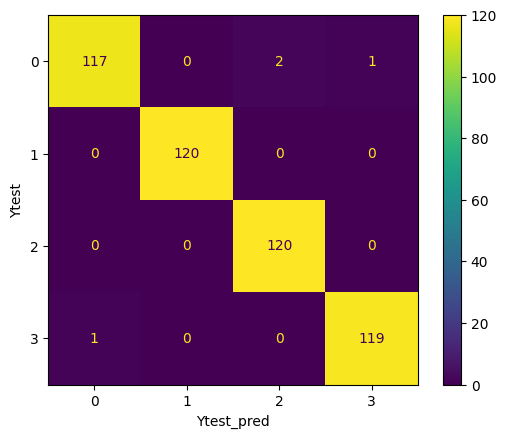

In [50]:
# Entrenamos el modelo con todos los datos de entrenamiento más validación
model_KNN.fit(Xcombined, Ycombined)

# Predecimos
Ytest_pred = model_KNN.predict(Xtest)

# Mostramos métricas y Confusion Matrix
print("Ytest:\n")
calcular_metricas(Ytest, Ytest_pred)

ConfusionMatrixDisplay(confusion_matrix(Ytest, Ytest_pred)).plot();
plt.xlabel('Ytest_pred')
plt.ylabel('Ytest')

De nuevo obtenemos resultados muy altos en todas las métricas, más del 99%. El modelo generaliza bien ya que hemos visto que da buenos resultados tanto en Yval como Ytest.

<u>**Bagging**</u>

Ytest:

Accuracy :  0.9916666666666667
Precision :  0.9918191056910569
Recall :  0.9916666666666667
f1-score :  0.9916656899515549


Text(0, 0.5, 'Ytest')

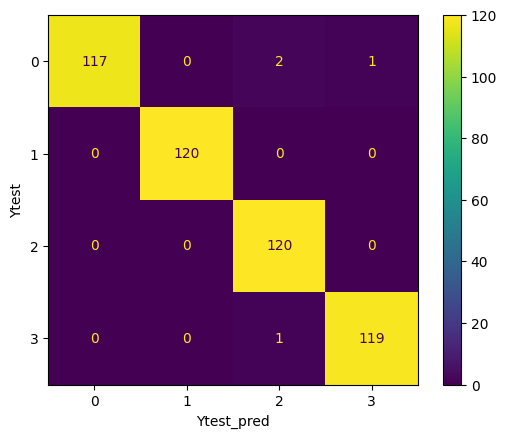

In [51]:
# Entrenamos el modelo con todos los datos de entrenamiento más validación
model_bagging.fit(Xcombined, Ycombined)

# Predecimos
Ytest_pred = model_bagging.predict(Xtest)

# Mostramos métricas y Confusion Matrix
print("Ytest:\n")
calcular_metricas(Ytest, Ytest_pred)

ConfusionMatrixDisplay(confusion_matrix(Ytest, Ytest_pred)).plot();
plt.xlabel('Ytest_pred')
plt.ylabel('Ytest')

Los resultados son muy buenos, como ocurría en Yval. Además estos son un poco mejores que los obtenidos con el modelo base SVC, gracias a que estamos usando bagging.

# **Ejercicio 2: Problema de regresión (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de regresión, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para desarrollar **lenguas electrónicas** capaces de determinar el pH de una solución acuosa. El conjunto de datos se obteniene a partir de la investigación realizada en los siguientes artículos:

- S. Capel-Cuevas, M.P. Cuéllar, I. de Orbe-Payá, M.C. Pegalajar, L.F. Capitán-Vallvey, Full-range optical pH sensor array based on neural networks, Microchemical Journal, Volume 97, Issue 2, 2011, Pages 225-233, ISSN 0026-265X, <a href="https://doi.org/10.1016/j.microc.2010.09.008">https://doi.org/10.1016/j.microc.2010.09.008</a>.

- Capel-Cuevas S, López-Ruiz N, Martinez-Olmos A, Cuéllar MP, Pegalajar Mdel C, Palma AJ, de Orbe-Payá I, Capitán-Vallvey LF. A compact optical instrument with artificial neural network for pH determination. Sensors (Basel). 2012;12(5):6746-63. doi: 10.3390/s120506746. Epub 2012 May 22. PMID: 22778668; PMCID: PMC3386767 (URL: <a href="https://pubmed.ncbi.nlm.nih.gov/22778668/">https://pubmed.ncbi.nlm.nih.gov/22778668/</a>.




## Contexto y motivación del problema

El pH es una medida que indica la acidez o alcalinidad de una solución. Se mide en una escala que va de 0 a 14, donde un pH de 7 es considerado neutro, valores por debajo de 7 indican acidez y valores por encima de 7 indican alcalinidad.

Las utilidades del pH son bastante amplias. Algunas son:

1. **En la agricultura**: Conocer el pH del suelo es crucial para determinar qué cultivos pueden crecer mejor en esa tierra y para ajustar la fertilización.

2. **En química**: En laboratorios, el pH es fundamental para llevar a cabo reacciones químicas adecuadas, ya que muchas reacciones dependen de un pH específico.

3. **En medicina**: En el ámbito médico, el pH de la sangre y otros fluidos corporales puede ser un indicador importante de la salud de una persona.

4. **En el tratamiento de aguas**: El pH del agua es esencial para asegurar que sea segura para el consumo y para el tratamiento de aguas residuales.

5. **En cosmética**: En productos de cuidado personal, el pH puede afectar la eficacia y la seguridad de los productos en la piel.


Habitualmente, el análisis de pH de una disolución es un proceso que conlleva la toma de muestras de la solución en cuestión, su transporte a un laboratorio, el análisis con métodos específicos de tratamiento (pH-metros) y el informe final de análisis de pH.


Como alternativa, **en esta práctica pretendemos elaborar un modelo de aprendizaje automático** capaz de ser integrado en **lenguas electrónicas** sensibles al pH de una disolución. Una lengua electrónica es un dispositivo o sistema que simula la capacidad del sentido del gusto y que se utiliza para analizar y evaluar diferentes líquidos, como alimentos y bebidas, mediante la detección de compuestos químicos.

<img src="https://pub.mdpi-res.com/biosensors/biosensors-08-00003/article_deploy/html/images/biosensors-08-00003-ag-550.jpg?1569758982" />

Estas *lenguas* funcionan a través de sensores que responden a diferentes sustancias químicas, generando un perfil de sabor que puede ser analizado y comparado. Son muy útiles en la industria alimentaria para controlar la calidad, desarrollar nuevos productos y realizar pruebas de sabor de manera objetiva. Además, las lenguas electrónicas pueden ser utilizadas en otras áreas, como el monitoreo ambiental y la detección de contaminantes. En resumen, son herramientas valiosas para obtener información sobre el sabor y la composición de líquidos de manera precisa y eficiente.

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41378-024-00690-9/MediaObjects/41378_2024_690_Figa_HTML.png" />


## El conjunto de datos

El modelo de regresión a desarrollar en esta práctica **tendrá como entrada los valores de un array de sensores (*papilas gustativas*) localizado en una lengua electrónica sensible al pH, y deberá proporcionar como resultado el valor de pH de la solución acuosa que entre en contacto con dicha lengua electrónica**.

En total dispondremos de **12 sensores distintos** (*papilas gustativas* de distinto tipo), capaces de cambiar de color ante la presencia de pH de distinta magnitud. Estos sensores se imprimen químicamente sobre un soporte o tarjeta, la cual se entra en contacto con la disolución para capturar sus propiedades.  El diseño de la disposición de estos sensores es la mostrada en la siguiente figura:


<center>
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0925400511001730-gr1.jpg" />
</center>

La reacción de cada sensor frente al pH produce un cambio de color en el mismo. Cada sensor se corresponde con un compuesto químico capaz de cambiar de color ante la detección de pH en un rango determinado. En concreto, el cambio se produce en la tonalidad o componente *Hue (H)* del espacio de color HSV (<a href="https://es.wikipedia.org/wiki/Modelo_de_color_HSV">https://es.wikipedia.org/wiki/Modelo_de_color_HSV</a>).


Cuando el array de sensores entra en contacto con una disolución, el valor de tonalidad color H del espacio HSV es capturado por el dispositivo electrónico (lengua electrónica) que se muestra en la siguiente figura, y es trasladado a un modelo de aprendizaje automático capaz de determinar el pH de la solución.

<center>
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0925400511001730-gr3.jpg" />
</center>


El modelo de decisión para determinar el pH de la disolución a partir de los datos de los sensores necesita ser entrenado previamente para tener un desempeño correcto. El conjunto de datos a utilizar tiene el siguiente formato:

- **Datos de entrada (X)**: Valor de tonalidad (componente H del espacio de color HSV) de cada uno de los sensores.
- **Datos de salida (Y)**: Valor de pH de la disolución.


Se ha generado un conjunto de datos para la práctica accesible desde el enlace mostrado en la siguiente celda de código, el cual deberá ser usado por el estudiante para elaborar la práctica.

In [52]:
import pandas as pd

path_to_data_regression= 'https://www.dropbox.com/scl/fi/3x7kovawtekmr20d8hd22/ElectronicTongue.csv?rlkey=7ewm92dgd09n32t576ah5kz36&st=hnabds8t&dl=1'

df= pd.read_csv(path_to_data_regression)
df.sample(5)




,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,pH
104,0.987558,0.156448,0.149665,0.249928,0.960539,0.241958,0.510685,0.331931,0.307030,0.194763,0.149291,0.142241,4.507728
149,0.075672,0.826093,0.028660,0.241755,0.944129,0.767681,0.887183,0.545761,0.588834,0.593286,0.892139,0.586133,11.749407
181,0.985843,0.132270,0.143249,0.232978,0.099133,0.192358,0.525591,0.184634,0.276978,0.192045,0.216315,0.148261,1.711410
179,0.077879,0.132713,0.149990,0.249002,0.961425,0.230687,0.491680,0.466904,0.516589,0.208043,0.082190,0.129966,5.940296
51,0.085404,0.830617,0.032252,0.252484,0.952381,0.794786,0.901384,0.544283,0.594899,0.581664,0.891119,0.595050,11.568771



## Tareas a realizar:

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un *ensemble*.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar, en su caso).
6. Entrenamiento y estimación del error fuera de la muestra usada para optimizar el modelo. Discusión de resultados y extracción de conclusiones.


## 2.1 Análisis descriptivo del problema y análisis exploratorio de los datos

Tenemos 197 entradas con 13 atributos, 12 de entrada y uno de salida (pH). Nuestro objetivo es predecir el nivel de pH en función de los valores de tonalidad de cada uno de los sensores de elementos químicos.

In [53]:
df.head(3)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,pH
0,0.087840,0.082959,0.043743,0.240354,0.962288,0.930497,0.573987,0.472071,0.585784,0.433157,0.951765,0.232850,9.750569
1,0.991412,0.138204,0.146882,0.253658,0.179650,0.223246,0.521936,0.239807,0.311388,0.173503,0.170280,0.139872,4.005951
2,0.981929,0.148916,0.149017,0.256501,0.029655,0.211787,0.527765,0.218596,0.306480,0.185925,0.196952,0.152865,3.175920


Todos los atributos, tanto de entrada como de salida, son de tipo float:

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S1      197 non-null    float64
 1   S2      197 non-null    float64
 2   S3      197 non-null    float64
 3   S4      197 non-null    float64
 4   S5      197 non-null    float64
 5   S6      197 non-null    float64
 6   S7      197 non-null    float64
 7   S8      197 non-null    float64
 8   S9      197 non-null    float64
 9   S10     197 non-null    float64
 10  S11     197 non-null    float64
 11  S12     197 non-null    float64
 12  pH      197 non-null    float64
dtypes: float64(13)
memory usage: 20.1 KB


Vemos que todos los atributos de entrada varían entre 0 y 1, con diferentes medias y desviaciones típicas, mientras el atributo de salida o pH varía entre 0 y 14, con media 7:

In [55]:
df.describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,pH
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.336011,0.311151,0.108007,0.244798,0.759533,0.415852,0.591829,0.403035,0.474449,0.329606,0.592519,0.257617,7.057899
std,0.416495,0.326254,0.052651,0.007554,0.367115,0.312690,0.147218,0.128811,0.132929,0.173125,0.384723,0.185455,3.730592
min,0.002813,0.010524,0.020254,0.221074,0.019397,0.050465,0.489487,0.172843,0.229236,0.069326,0.032001,0.019680,0.037633
25%,0.073306,0.096973,0.038023,0.239667,0.938072,0.199607,0.510685,0.305738,0.307626,0.202479,0.180242,0.140835,4.266753
50%,0.077789,0.132687,0.143181,0.243952,0.954763,0.233274,0.526194,0.462901,0.571261,0.245947,0.888424,0.171341,7.301463
75%,0.983059,0.780666,0.148979,0.250068,0.962389,0.773299,0.563804,0.482598,0.583058,0.495607,0.955536,0.268205,10.048606
max,0.996590,0.939229,0.156874,0.260703,0.993289,0.977786,0.926026,0.554047,0.610545,0.914962,0.981891,0.798830,13.935019


Vamos a mostrar histogramas para cada valor:

In [56]:
atributos = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12']

In [57]:
def show_histograms(df):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
    axes = axes.flatten()

    for i, atributo in enumerate(atributos):
        axes[i].hist(df[atributo], bins=30)
        axes[i].set_title(atributo)
        axes[i].set_xlabel('Valores')
        axes[i].set_ylabel('Frecuencia')
        axes[i].set_xlim(0, 1)

    plt.tight_layout()
    plt.show()

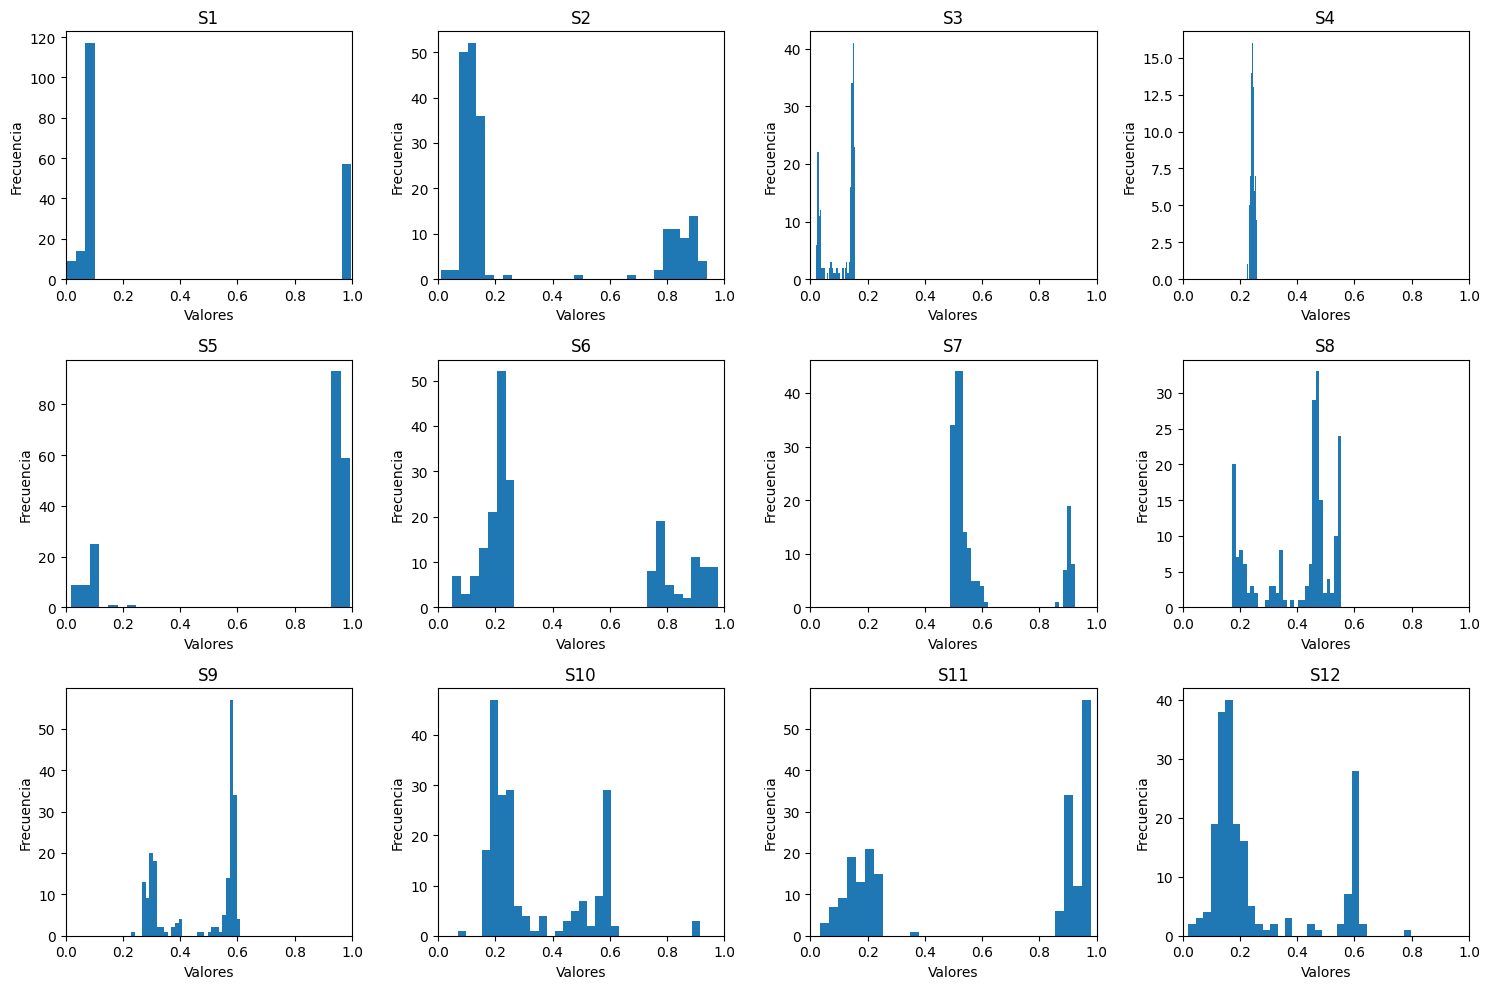

In [58]:
show_histograms(df)

Vemos que la varianza de unos atributos es muy distinta de la de otros, atributos como S4 tienen poca varianza y valores muy concentrados mientras S1 y S11 tienen valores más dispersos.

Vamos a ver ahora los histogramas para los datos que tienen un pH menor y mayor que 7:

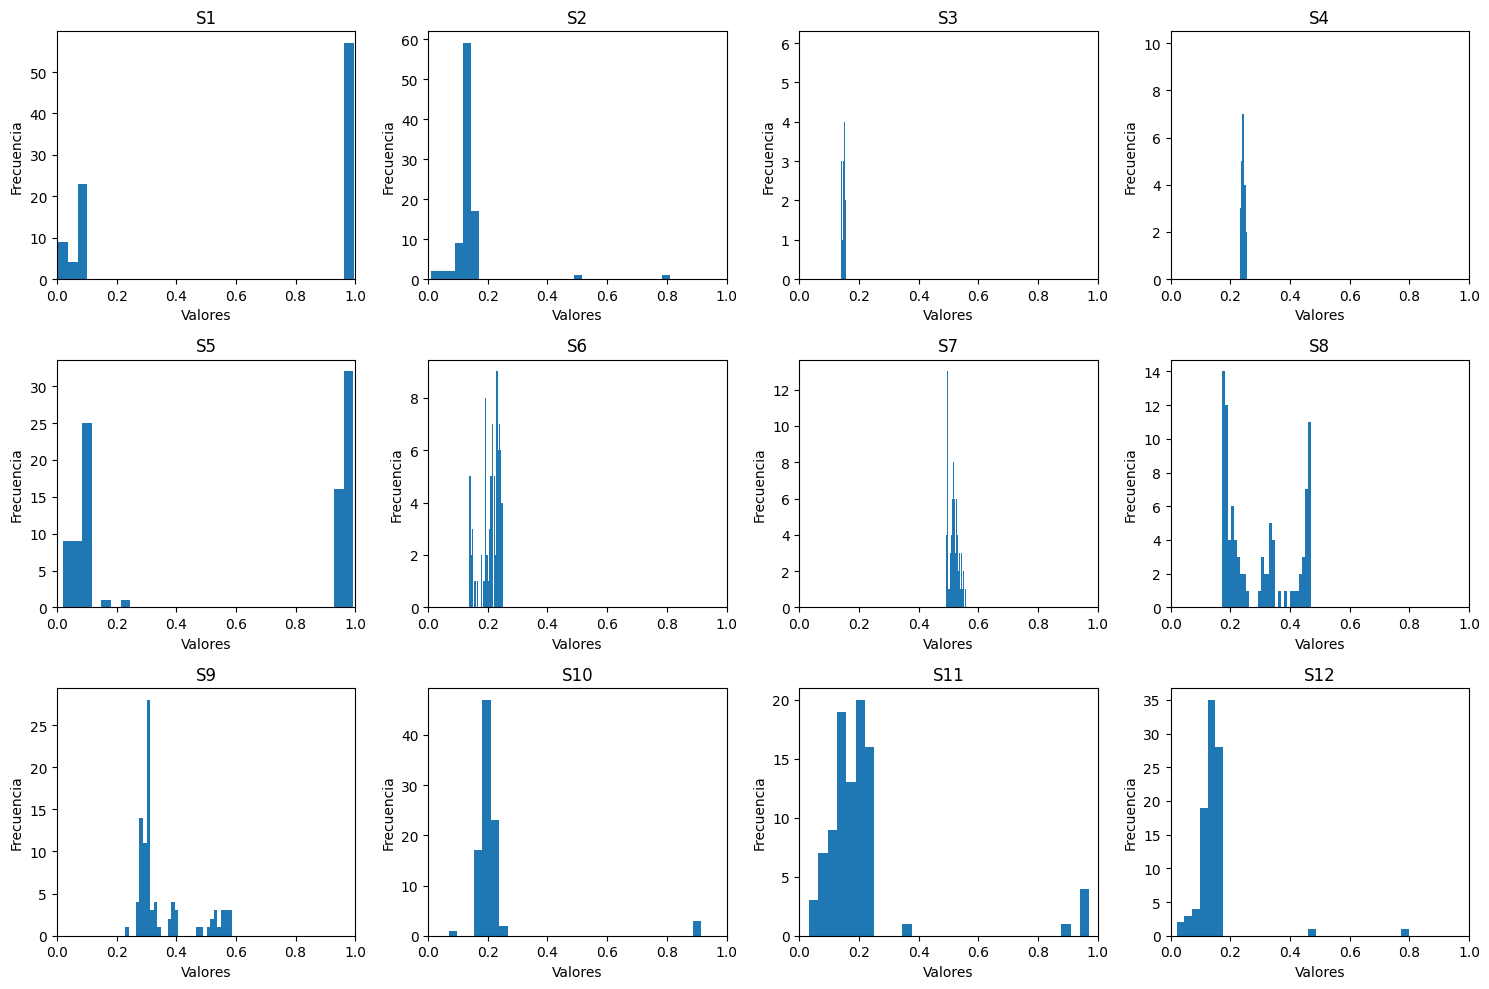

In [59]:
show_histograms(df[df['pH']<7])

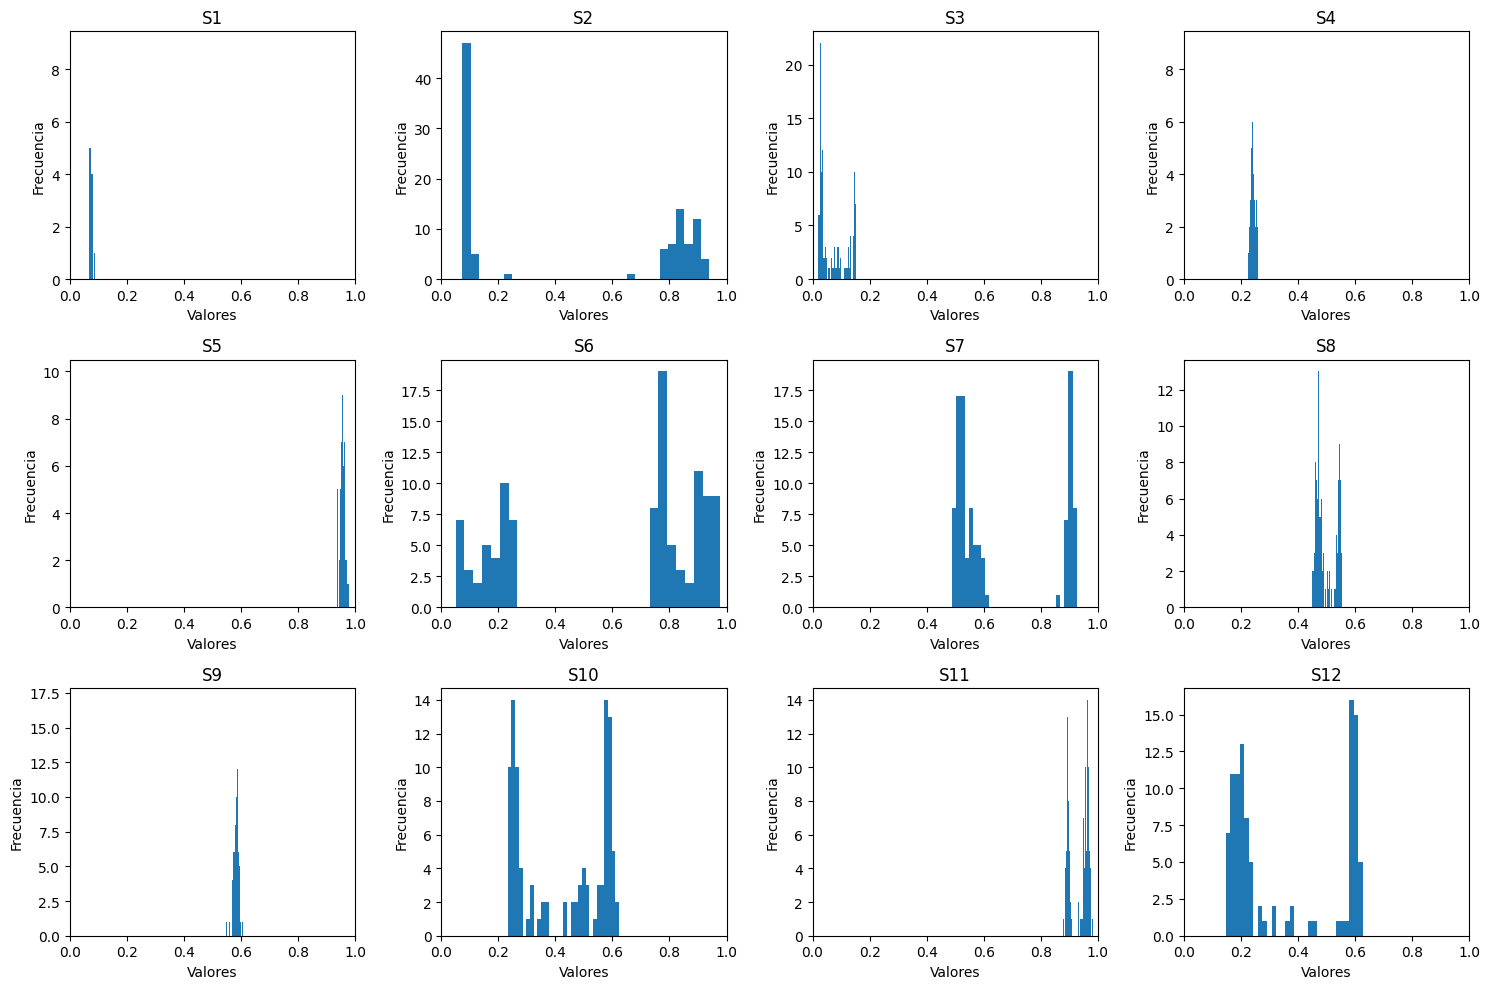

In [60]:
show_histograms(df[df['pH']>7])

Las diferencias de patrones en los atributos es cada caso son diferentes, por ejemplo, S3 y S7 tienen valores más concentrados cuando el pH es menor que 7, S11 tiene valores más cerca de 0 cuando el pH es menor, y S12 tiene valores más dispersos y mayores cuando el pH es mayor.

Veamos ahora gráficas con la relación entre cada atributo y el pH:

In [61]:
def show_plots(df):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
    axes = axes.flatten()

    for i, atributo in enumerate(atributos):
        axes[i].plot(df[atributo], df['pH'], '*')
        axes[i].set_xlabel(atributo)
        axes[i].set_ylabel('pH')
        axes[i].set_title(atributo)

    plt.tight_layout()
    plt.show()

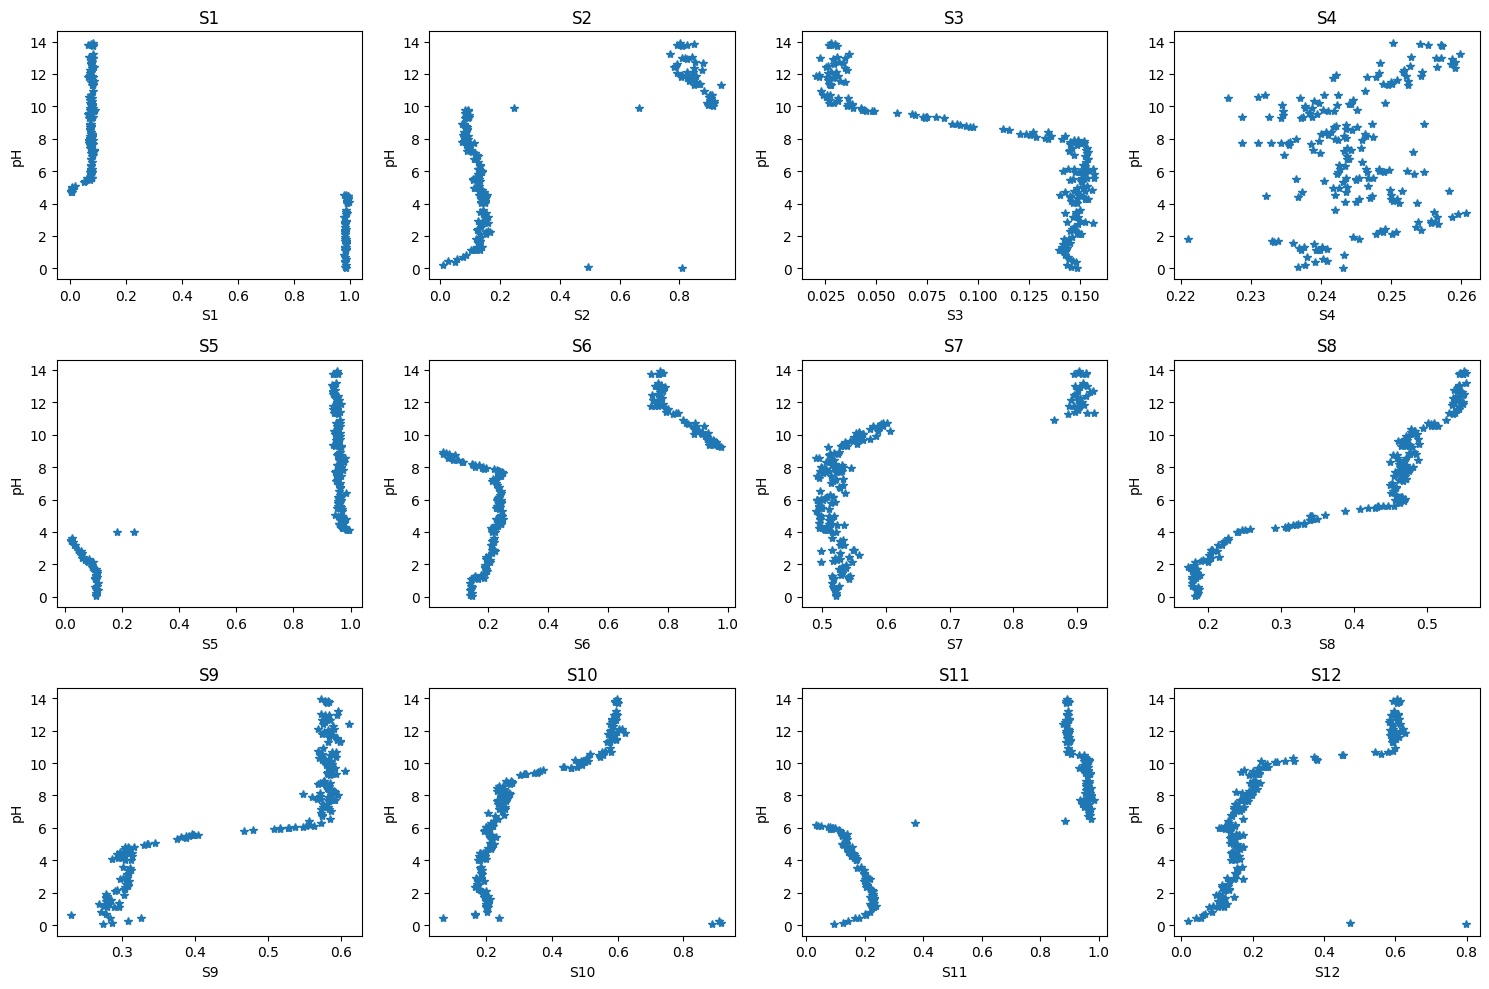

In [62]:
show_plots(df)

Podemos observar como es fácil identificar varios patrones en los atributos, por ejemplo cuanto mayor es S8, S9, S10 o S12, mayor es el pH.

Además, vemos cambios grandes o saltos a partir de ciertos niveles de pH en los atributos, y estos son a partir de cierto nivel de pH distinto. Esto nos permite identificar fácilmente si estamos por encima o por debajo de cierto nivel de pH según un atributo.

Por ejemplo, si S1 es muy alto, sabemos que el pH estará por debajo de 4.25, si S2 es muy alto, el pH estará por encima de 10, si el valor de S6 es muy alto el pH estará por encima de 8.5...

Además, en ciertos atributos vemos un avance más progresivo y proporcional al pH, como S8, S10 y S12, lo que hace que estos atributos nos aporten suficiente información como para poder usar solo unos pocos de estos en selección de características. Por otra parte el atributo S4 parece que aporta poca información, por lo que podría eliminarse en este proceso.

Los datos de los diferentes atributos no siguen patrones lineales, por lo que serán más precisos los modelos de aprendizaje no lineales.

## 2.3.1 Protocolo de validación experimental

Antes de realizar ```1.2 Preprocesado de datos```, vamos a dividir los datos en train, val y test, para hacer así el preprocesado solo en los de train y val.

Datos de entrada X, que están formados por los datos recibidos por 12 sensores:

In [63]:
X = df[['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12']]
X

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
0,0.087840,0.082959,0.043743,0.240354,0.962288,0.930497,0.573987,0.472071,0.585784,0.433157,0.951765,0.232850
1,0.991412,0.138204,0.146882,0.253658,0.179650,0.223246,0.521936,0.239807,0.311388,0.173503,0.170280,0.139872
2,0.981929,0.148916,0.149017,0.256501,0.029655,0.211787,0.527765,0.218596,0.306480,0.185925,0.196952,0.152865
3,0.072656,0.114040,0.149145,0.228738,0.945559,0.240352,0.521567,0.464956,0.591732,0.235044,0.961599,0.169974
4,0.077545,0.896920,0.038023,0.242319,0.955601,0.886227,0.564030,0.487052,0.586597,0.501194,0.952609,0.262741
...,...,...,...,...,...,...,...,...,...,...,...,...
192,0.048954,0.127506,0.151243,0.243166,0.970230,0.248081,0.490562,0.388016,0.374485,0.214474,0.139665,0.150581
193,0.075856,0.096109,0.074989,0.228797,0.948961,0.954146,0.531963,0.476886,0.586978,0.344549,0.968267,0.209579
194,0.984933,0.047998,0.148072,0.239157,0.115247,0.140952,0.521391,0.183756,0.326273,0.240345,0.164374,0.041939
195,0.073504,0.074298,0.087286,0.254718,0.964322,0.050465,0.525504,0.482413,0.576687,0.276856,0.955536,0.202215


In [64]:
y = df['pH']
y

0       9.750569
1       4.005951
2       3.175920
3       7.718407
4      10.072566
         ...    
192     5.305802
193     9.357375
194     0.410476
195     8.902605
196     0.450771
Name: pH, Length: 197, dtype: float64

Dividimos el conjunto de datos en un 20 % de test y del 80 % restante un 80 % en train y un 20 % en validación. Lo haremos sin estratificación ya que esta técnica solo se puede utilizar en problemas de clasificación, para mantener la misma cantidad de datos de cada clase, pero al estar en un problema de regresión no tenemos clases.

In [65]:
from sklearn.model_selection import train_test_split

# Sin estratificación
print('DIVISION TRAIN/TEST al 20% de test SIN ESTRATIFICAR')
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size= 0.2, random_state= 123)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size= 0.2, random_state= 123)
print('El conjunto completo de datos tiene', len(y), 'patrones, el conjunto de train', len(Ytrain), ', el conjunto de val', len(Yval), 'y el de test', len(Ytest), '.')

DIVISION TRAIN/TEST al 20% de test SIN ESTRATIFICAR
El conjunto completo de datos tiene 197 patrones, el conjunto de train 125 , el conjunto de val 32 y el de test 40 .


## 2.2 Preprocesado de datos

**Tratamiento de valores perdidos**

Como vemos a continuación, no hay valores perdidos, por lo que no es necesario tratarlos o usar técnicas de imputación como SimpleImputer o KNNImputer.

In [66]:
df.isnull().sum()

S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
S7     0
S8     0
S9     0
S10    0
S11    0
S12    0
pH     0
dtype: int64

**Procesado de datos extremos/atípicos**

Antes de eliminar los outliners, veamos de nuevo los los histogramas:

In [67]:
def show_plots(X, Y):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
    axes = axes.flatten()

    for i, atributo in enumerate(atributos):
        axes[i].plot(X[atributo], Y, '*')
        axes[i].set_xlabel(atributo)
        axes[i].set_ylabel('pH')
        axes[i].set_title(atributo)

    plt.tight_layout()
    plt.show()

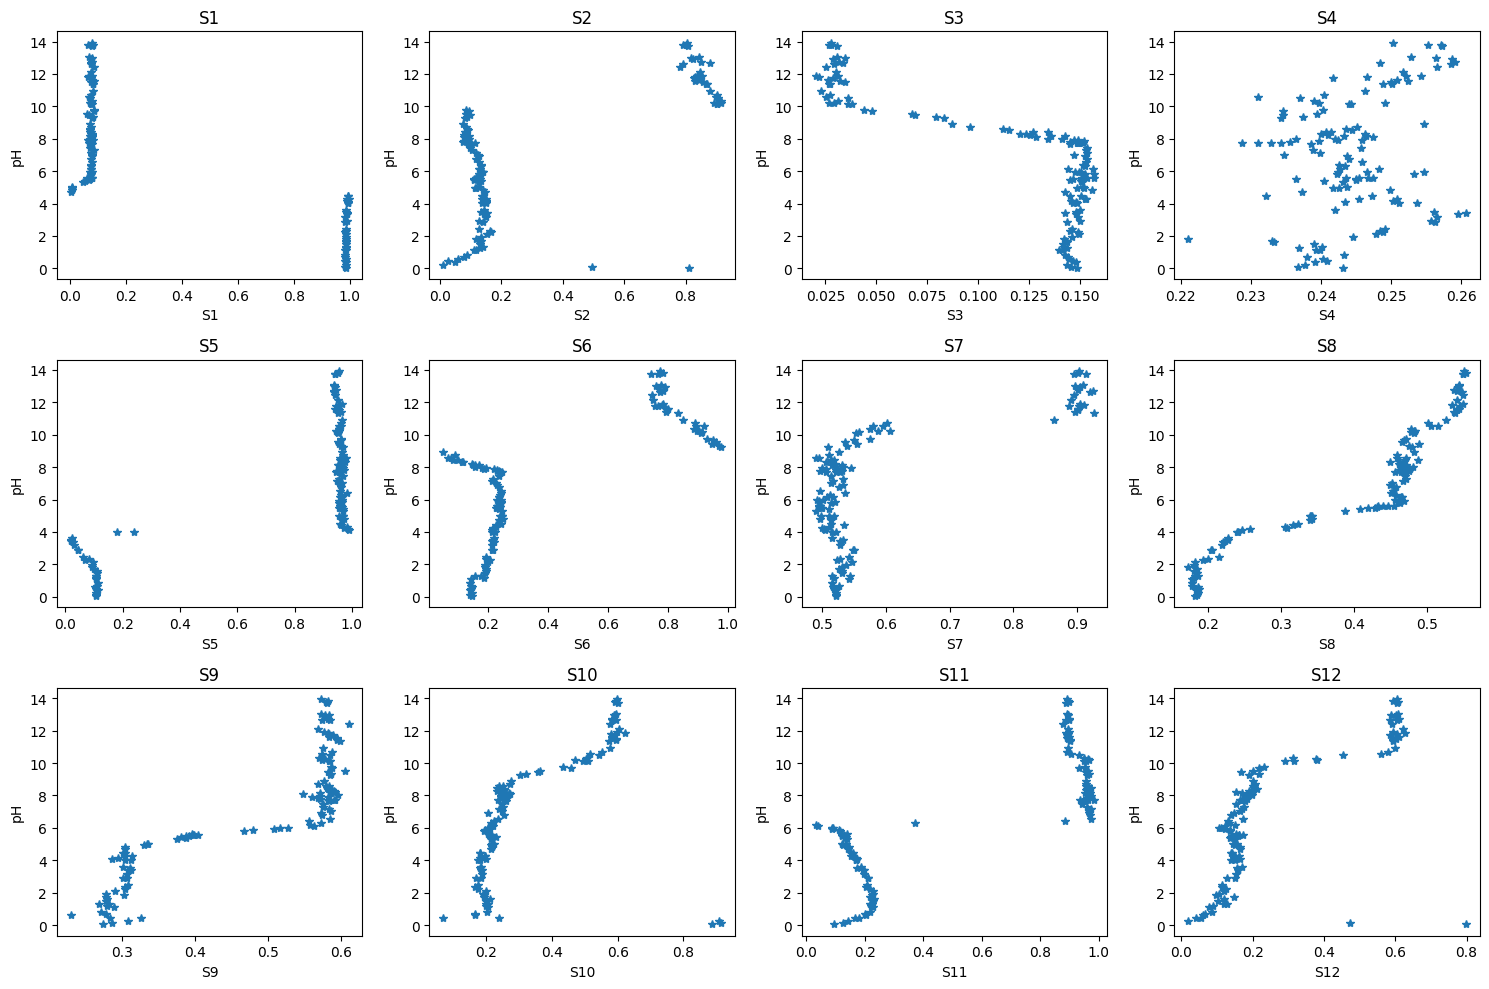

In [68]:
show_plots(Xtrain, Ytrain)

Vemos como los atributos que tienen outliners o puntos bastante alejados del resto son S2, S4, S5, S9, S10, S11, S12.

Para eliminar outliners vamos a utilizar Isolation Forest. Es un algoritmo que se basa en la idea de que los outliers son puntos de datos que son más fáciles de aislar en comparación con los puntos normales.

El algoritmo crea múltiples árboles de decisión de forma aleatoria. El proceso se repite recursivamente hasta que todos los puntos de datos están aislados o se alcanza una profundidad máxima. Los puntos de datos que son outliers tienden a ser aislados más rápidamente, por lo que son estos los que se eliminan.


In [69]:
from sklearn.ensemble import IsolationForest

def remove_outliners_with_isolation_forest(X, Y, atributos):
    model = IsolationForest(contamination=0.01)  # Indicamos el porcentaje de datos outliners

    for atributo in atributos:
        model.fit(pd.concat([X[atributo], Y], axis=1))

        pred = model.predict(pd.concat([X[atributo], Y], axis=1))  # -1 para outliers, 1 para inliers

        X = X[pred == 1]
        Y = Y[pred == 1]
    return X, Y

Eliminamos los outliners de los atributos mencionados anteriormente:

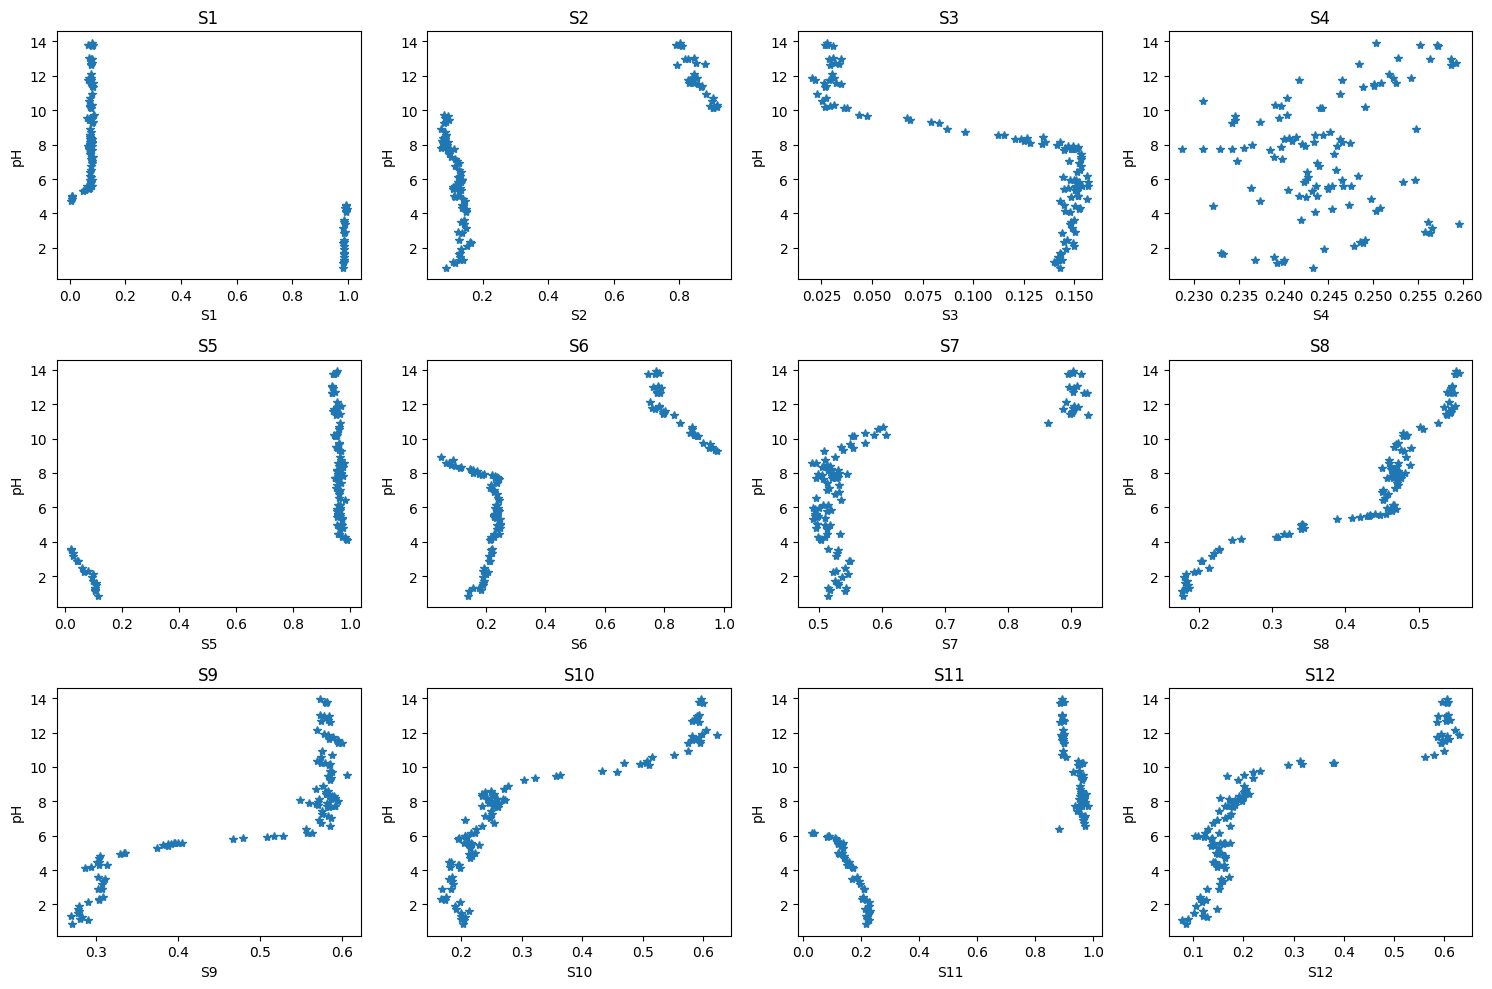

In [70]:
Xtrain, Ytrain = remove_outliners_with_isolation_forest(Xtrain, Ytrain, ['S2', 'S4', 'S5', 'S9', 'S10', 'S11', 'S12']);
show_plots(Xtrain, Ytrain)

Como podemos ver en comparación a los histogramas mostrados anteriormente, ya no aparecen los puntos aislados o outliners en esos atributos.

Ahora eliminamos los outliners del conjunto de validación, en concreto en el atributo S6:

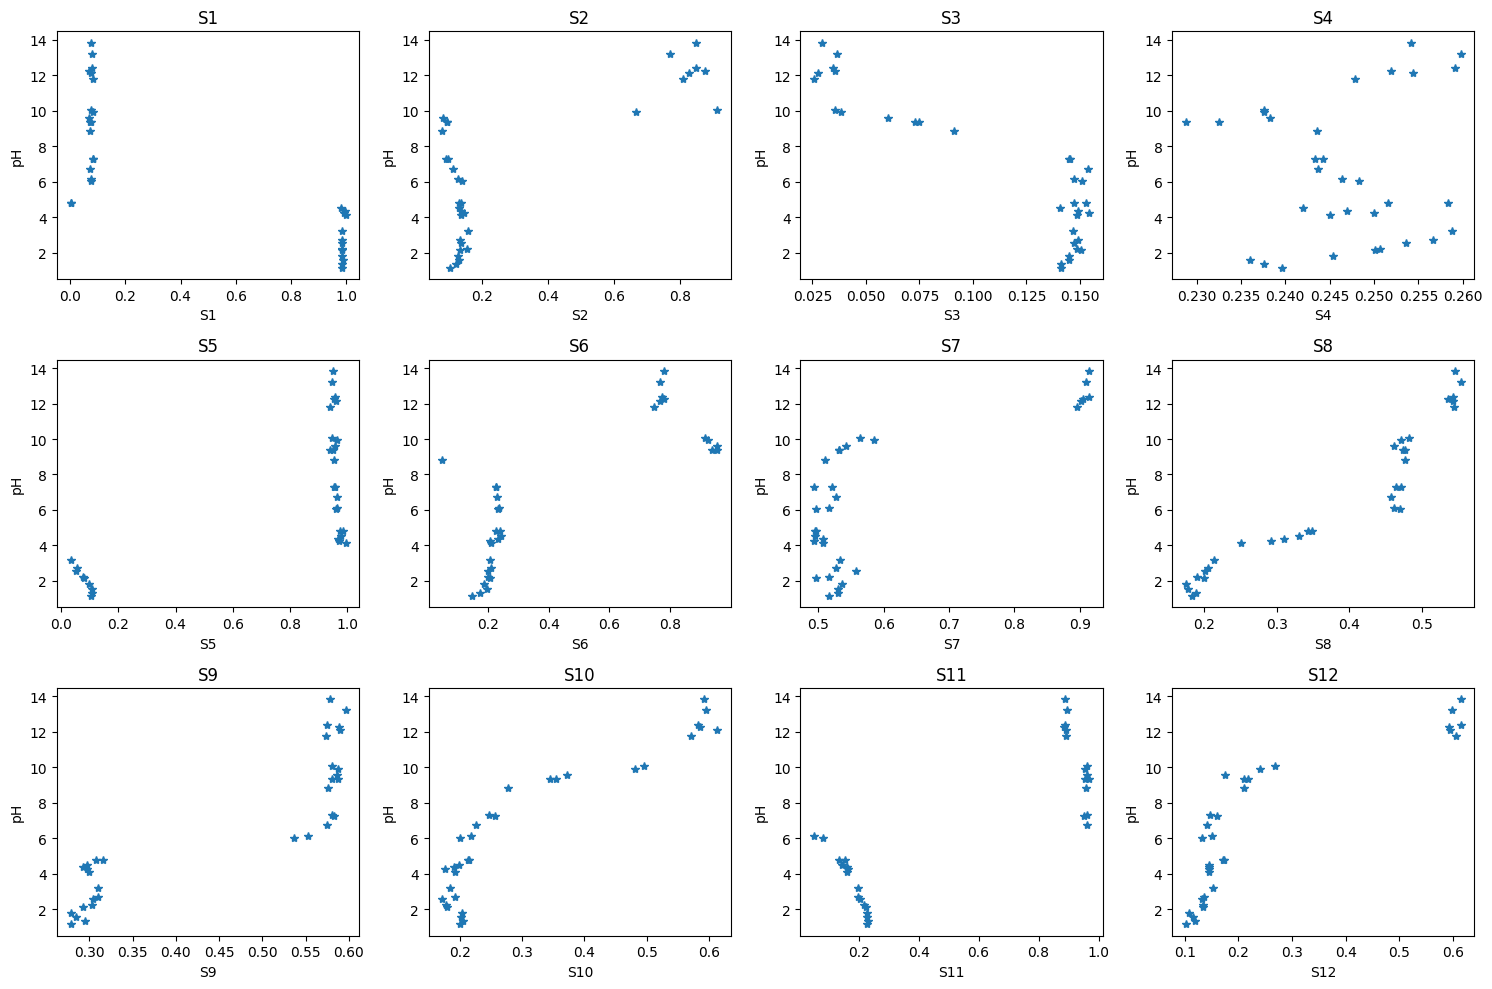

In [71]:
show_plots(Xval, Yval)

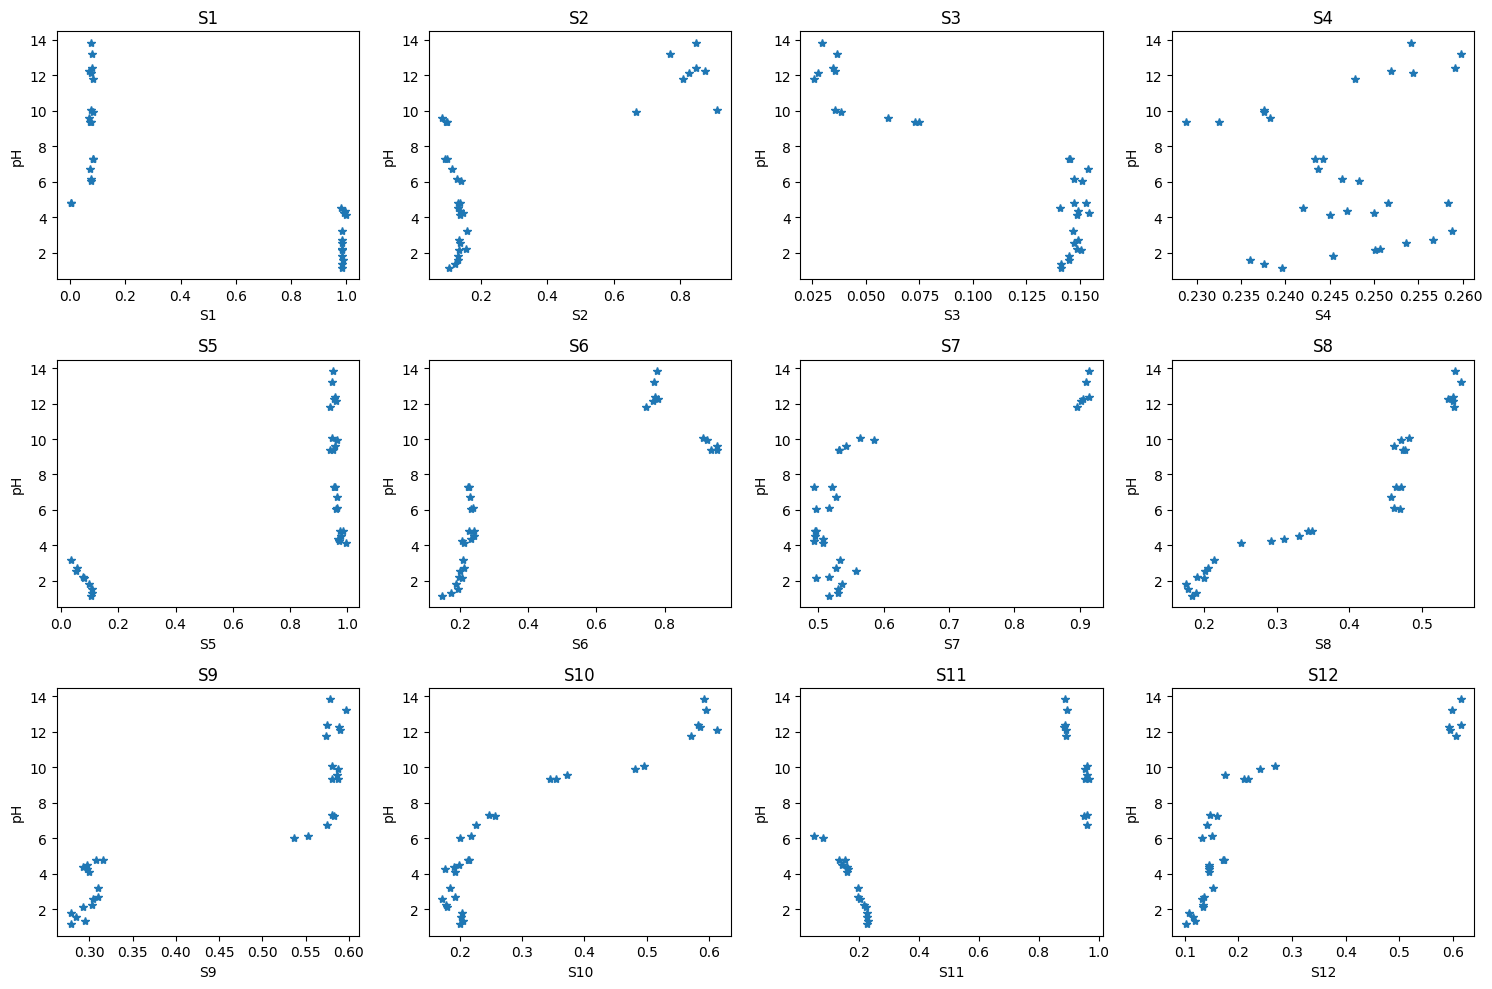

In [72]:
Xval, Yval = remove_outliners_with_isolation_forest(Xval, Yval, ['S6']);
show_plots(Xval, Yval)

**Selección de características**

Vamos a realizar una selección de características para escoger los atributos que mejor nos permiten predecir las variables de salida, y ver si dan buen resultado.

Seleccionamos los 3 mejores atributos con SelectKBest:

In [73]:
from sklearn.feature_selection import SelectKBest, f_regression

skb = SelectKBest(score_func = f_regression, k=3)
skb.fit(Xtrain, Ytrain.to_numpy())
Xtrain_final = skb.transform(Xtrain)
Xval_final = skb.transform(Xval)
print('La selección de características me da el conjunto Xtrain_final:\n{}\n[...]'.format(Xtrain_final[0]))

La selección de características me da el conjunto Xtrain_final:
[0.17803011 0.28903371 0.20515477]
[...]


Podemos ver que los atributos que se han seleccionado son S8, S9 y S10, ya que vemos que coinciden los valores de las columnas.

Tiene sentido que se hayan seleccionado estos tres ya que como se ha mencionado anteriormente en los histogramas, los datos de estos atributos parecen tener una relación o cambio progresivo en función del valor del pH, al contrario que otros que se mantienen constantes hasta que dan un salto.

Además, como era de esperar, no se ha seleccionado el atributo S4, que era el que parecía tener mayor aleatoriedad y ser menos predecible.

In [74]:
Xtrain.head(1)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
135,0.98288,0.115814,0.141157,0.239225,0.107388,0.14405,0.542041,0.17803,0.289034,0.205155,0.228211,0.078962


Para comparar, vemos los resultados con un modelo para los datos antes y después de seleccionar y eliminar los atributos:

In [75]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

model = SVR(kernel='linear')
model.fit(Xtrain, Ytrain)
Ytrain_pred = model.predict(Xtrain)
Yval_pred = model.predict(Xval)

r2_train = r2_score(Ytrain, Ytrain_pred)
r2_val = r2_score(Yval, Yval_pred)

print('r2 en train:', r2_train, '\nr2 en val:', r2_val)

r2 en train: 0.958641236940725 
r2 en val: 0.970761594504436


Guardamos los cambios de eliminación de atributos y vemos los resultados:

In [76]:
Xtrain = pd.DataFrame(Xtrain_final)
Xval = pd.DataFrame(Xval_final)

In [77]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

model = SVR(kernel='linear')
model.fit(Xtrain, Ytrain)
Ytrain_pred = model.predict(Xtrain)
Yval_pred = model.predict(Xval)

r2_train = r2_score(Ytrain, Ytrain_pred)
r2_val = r2_score(Yval, Yval_pred)

print('r2 en train:', r2_train, '\nr2 en val:', r2_val)

r2 en train: 0.9212503823475279 
r2 en val: 0.9208308425998046


Vemos que aunque han empeorado un poco los resultados, siguen siendo aceptables para este modelo de prueba, a pesar de estar utilizando solo 3 atributos de los 11.

**Estandarización**

Vemos como cada las medias y desviaciones típicas de los atributos de entrada son un poco diferentes, por lo que vamos a realizar una estandarización, de forma que mejore la precisión y velocidad de los modelos:

In [78]:
Xtrain.describe()

,0,1,2
count,111.000000,111.000000,111.000000
mean,0.418159,0.485036,0.316878
std,0.118565,0.126329,0.155658
min,0.178030,0.268498,0.167100
25%,0.341396,0.331501,0.206242
50%,0.464607,0.571557,0.245300
75%,0.482505,0.583199,0.463255
max,0.554047,0.605708,0.623455


In [79]:
from sklearn.preprocessing import StandardScaler

# Estandarización (normalización de datos con media 0 y std 1)
se = StandardScaler()
se.fit(Xtrain)

Xtrain_transformed = se.transform(Xtrain)
Xval_transformed = se.transform(Xval)

# Convertimos de nuevo a DataFrame y guardamos el resultado
Xtrain = pd.DataFrame(Xtrain_transformed, columns=Xtrain.columns)
Xval = pd.DataFrame(Xval_transformed, columns=Xval.columns)

In [80]:
Xtrain.describe()

,0,1,2
count,1.110000e+02,1.110000e+02,1.110000e+02
mean,-1.166234e-15,-6.761358e-16,-7.831573e-16
std,1.004535e+00,1.004535e+00,1.004535e+00
min,-2.034472e+00,-1.721853e+00,-9.665905e-01
25%,-6.503694e-01,-1.220871e+00,-7.139831e-01
50%,3.935270e-01,6.879895e-01,-4.619233e-01
75%,5.451720e-01,7.805602e-01,9.446438e-01
max,1.151308e+00,9.595501e-01,1.978491e+00


## 2.3.2 Métricas de evaluación del rendimiento

Vamos a usar las siguientes métricas de rendimiento para evaluar los modelos:

* MAE (Mean Absolute Error): Mide la media de las diferencias absolutas entre los valores predichos y los valores reales. Un MAE más bajo indica un mejor rendimiento del modelo. No penaliza los errores grandes tanto como RMSE ya que las diferencias no están al cuadrado.
  
  $$MAE = \frac{1}{m} \sum_{i=1}^{m} |y_i - \hat{y}_i|$$

* RMSE: Mide la raíz cuadrada de la media de los cuadrados de los errores. A diferencia del MAE, da más peso a los errores grandes debido al uso del cuadrado. Un RMSE más bajo indica un mejor ajuste del modelo.

  $$RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2}$$

* R2: Indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Se calcula comparando el modelo (ver el numerador) con un modelo de referencia que predice la media de los valores reales (ver el denominador, que compara cada 'y' real con la media).

  $$R^2 = 1 - \frac{\sum_{i=1}^{m} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{m} (y_i - \bar{y})^2}$$

  Varía entre 0 y 1, un valor cerca de 0 indica un mal ajuste, y un valor cerca de 1 un buen ajuste.

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def calcular_metricas(y_true, y_pred):
    metricas = {
        'MAE': mean_absolute_error,
        'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
        'R²': r2_score
    }

    for metrica in metricas:
        f_metrica = metricas[metrica]
        valor = f_metrica(y_true=y_true, y_pred=y_pred)
        print(metrica, ': ', valor)

## 2.4 Selección de modelos de aprendizaje automático

<u>**SVM (Support Vector Machine): SVR (Support Vector Regression)**</u>

Al igual que SVC, SVR es un tipo de Support Vector Machine que se encarga de encontrar un hiperplano, con la diferencia que en lugar de buscar uno que separe diferentes clases, SVR busca un hiperplano que se ajuste a los datos de tal manera que la mayoría de los puntos queden dentro de un margen específico, es decir, intenta predecir los datos con este hiperplano.

En esta ocasión vamos  a probar con distintos tipos de kernel:
* Kernel lineal: No transforma los datos y se utiliza cuando se espera que la relación entre las variables sea lineal.
* Kernel polinómico: Transforma los datos en un espacio de características polinómico. La forma general es $(x⋅y+c)^d$.
* Kernel RBF: Transforma los datos a un espacio de dimensiones superior. La forma es $ K(X_1, X_2) = e^{-ℽ||X_1-X_2||^2} $.

Parámetros:

* ℽ: Solo para el kernel RBF. Se debe encontrar el valor adecuado de ℽ para obtener un buen rendimiento. Un valor gamma mayor hace que la función tenga más picos y un límite de decisión más complejo, lo que puede causar overfitting, mientras que un valor gamma bajo da lugar a un límite de decisión más suave y a un modelo más generalizable a nuevos datos.
* degree: Solo para el kernel polinómico. Determina el grado del polinomio que se utilizará. Un grado bajo puede ser adecuado para capturar relaciones más simples, y será menos propenso al sobreajuste. Un grado más alto permite que el modelo capture relaciones más complejas y no lineales, pero puede aumentar el riesgo de sobreajuste.
* C: Es el parámetro de regularización, utilizado para prevenir el sobreajuste del modelo a los datos de entrenamiento. Cuanto menor es C, mayor es la tolerancia a la clasificación errónea y por tanto generaliza mejor, y cuanto mayor es C, menor es la tolerancia.
* epsilon: Determina un margen de tolerancia en el que los errores de predicción son aceptables. Un valor grande de epsilon permite más errores, lo que puede resultar en un modelo más simple y generalizable.

<u>**Regresión Ridge**</u>

Es una versión regularizada de la regresión lineal. La diferencia con esta es que añade un término de regularización a la función de costo (que era MSE).

$$\text{Costo} = \frac{1}{m} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \frac{\alpha}{m} \sum_{i=1}^{n} \theta_i^2$$

El término añadido depende de los coeficientes ($\theta_i$). Esto hace que el modelo intente minimizar el valor de los coeficientes, de forma que busca mayor regularización y evitar el sobreajuste.

Si α = 0, el modelo será una regresión lineal, y si es muy
grande, los coeficientes terminarán muy cerca de cero y el
resultado será una línea plana que pasa por la media de los datos.

Parámetros:
* α: A mayor es α, menores los coeficientes y mayor será la regularización.

<u>**Random Forest**</u>

Un Random Forest utiliza árboles de decisión, por lo que vamos a explicar primero estos.

Un árbol de decisión divide recursivamente los datos en base a los atributos seleccionados (cuando son continuos se discretizan previamente). Al principio todos los datos o ejemplos de entrenamiento están en el nodo raíz y se construye el árbol mediante divide y vencerás de forma recursiva. Cada división se realiza de forma que minimice la variabilidad del valor objetivo en los subconjuntos resultantes.

Un Random Forest crea varios árboles de decisión y combina sus predicciones. Es un ensemble de árboles de decisión, generalmente
entrenados con bagging. Al promediar las predicciones de varios árboles, reduce la varianza y mejora la generalización.

Parámetros:
* n_estimators: Número de árboles que usará. Cuando es un número mayor, la precisión del modelo suele crecer.
* max_depth: Profundidad máxima de cada árbol. Limitarla puede ayudar a prevenir el sobreajuste.
* min_samples_split: Número mínimo de muestras requeridas para dividir un nodo. Un valor más alto puede ayudar a prevenir el sobreajuste al requerir que un nodo tenga más muestras antes de ser dividido.
* min_samples_leaf: Número mínimo de muestras que debe tener una hoja. Un valor más alto puede ayudar a prevenir el sobreajuste.
* max_features: Número de características a considerar al buscar la mejor división en cada árbol. Con 'sqrt' este número será la raíz cuadrada del número total de características, con 'log2' el logaritmo en base dos.

## 2.5 Selección de hiperparámetros

<u>**SVM (Support Vector Machine): SVR (Support Vector Regression)**</u>

Utilizamos GridSearchCV para encontrar los mejores hiperparámetros, además vamos a utilizarlo también para determinar el kernel a usar:

In [82]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definimos el modelo
model_SVR = SVR()

# Definir el rango de parámetros a buscar
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [1, 10, 50],
    'gamma': [0.1, 0.5, 1],
    'degree': [2, 3],
    'epsilon': [0.1, 0.2, 0.3]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model_SVR, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Ajustamos el modelo
grid_search.fit(Xtrain, Ytrain)

# Mostramos los mejores parámetros
print()
print("Mejores parámetros:", grid_search.best_params_)

# Evaluamos el modelo con los mejores parámetros
Ytrain_pred = grid_search.best_estimator_.predict(Xtrain)
Yval_pred = grid_search.best_estimator_.predict(Xval)

# Mostramos métricas
print()
print("Ytrain:\n")
calcular_metricas(Ytrain, Ytrain_pred)
print()
print("Yval:\n")
calcular_metricas(Yval, Yval_pred)

Fitting 5 folds for each of 162 candidates, totalling 810 fits

Mejores parámetros: {'C': 50, 'degree': 2, 'epsilon': 0.2, 'gamma': 0.5, 'kernel': 'rbf'}

Ytrain:

MAE :  0.3086275699942626
RMSE :  0.41074537812729495
R² :  0.9857549251475136

Yval:

MAE :  0.29572291116372595
RMSE :  0.4365292496767281
R² :  0.9877727770707742


Los hiperparámetros {'C': 50, 'epsilon': 0.2, 'gamma': 0.5, 'kernel': 'rbf'} han dado buenos resultados, más del 0.98 en r2 tanto en train como en val.

El kernel que mejor resultados ha dado en RBF, que es uno de los más efectivos y populares, por lo que era de esperar.

Ha tomado un valor de C alto, es decir, una función ajustada es la que mejor se adapta a los datos, no solo en Ytrain, también vemos que tiene buenos resultados en Yval.

Creamos el modelo con ellos:

Ytrain:

MAE :  0.3086275699942626
RMSE :  0.41074537812729495
R² :  0.9857549251475136

Yval:

MAE :  0.29572291116372595
RMSE :  0.4365292496767281
R² :  0.9877727770707742


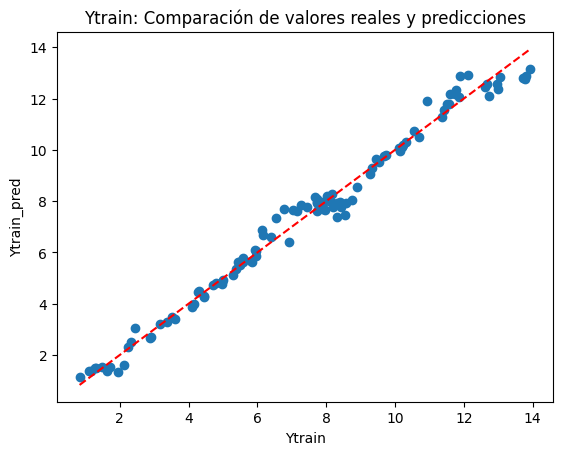

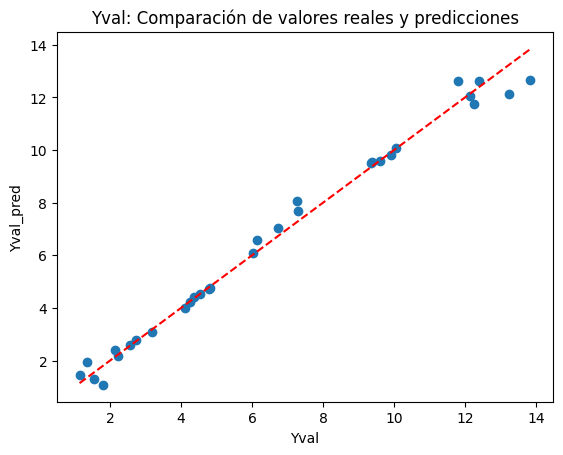

In [83]:
from sklearn.svm import SVR

# Definimos el modelo
model_SVR = SVR(kernel='rbf', C=50, gamma=0.5, epsilon=0.2)
 
# Entrenamos el modelo
model_SVR.fit(Xtrain, Ytrain)

# Predecimos
Ytrain_pred = model_SVR.predict(Xtrain)
Yval_pred = model_SVR.predict(Xval)

# Mostramos métricas
print("Ytrain:\n")
calcular_metricas(Ytrain, Ytrain_pred)
print()
print("Yval:\n")
calcular_metricas(Yval, Yval_pred)

# Visualizamos la precisión de los resultados en un scatter plot
plt.scatter(Ytrain, Ytrain_pred)
plt.plot([Ytrain.min(), Ytrain.max()], [Ytrain.min(), Ytrain.max()], 'r--')  # Línea de referencia
plt.xlabel('Ytrain')
plt.ylabel('Ytrain_pred')
plt.title('Ytrain: Comparación de valores reales y predicciones')
plt.show()

plt.scatter(Yval, Yval_pred)
plt.plot([Yval.min(), Yval.max()], [Yval.min(), Yval.max()], 'r--')  # Línea de referencia
plt.xlabel('Yval')
plt.ylabel('Yval_pred')
plt.title('Yval: Comparación de valores reales y predicciones')
plt.show()

Las métricas son buenas y no se aprecian errores grandes en los scatter plots.

<u>**Regresión Ridge**</u>

Buscamos el mejor valor entre varios del parámetro alpha:

In [84]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definimos el modelo
model_ridge = Ridge(random_state=123)

# Definir el rango de parámetros a buscar
param_grid = {
    'alpha': [0.1, 0.5, 1, 2, 2.5, 3]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model_ridge, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Ajustamos el modelo
grid_search.fit(Xtrain, Ytrain)

# Mostramos los mejores parámetros
print()
print("Mejores parámetros:", grid_search.best_params_)

# Evaluamos el modelo con los mejores parámetros
Ytrain_pred = grid_search.best_estimator_.predict(Xtrain)
Yval_pred = grid_search.best_estimator_.predict(Xval)

# Mostramos métricas
print()
print("Ytrain:\n")
calcular_metricas(Ytrain, Ytrain_pred)
print()
print("Yval:\n")
calcular_metricas(Yval, Yval_pred)

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Mejores parámetros: {'alpha': 1}

Ytrain:

MAE :  0.5695621715382774
RMSE :  0.6677766596940117
R² :  0.9623485387413133

Yval:

MAE :  0.5547729237030068
RMSE :  0.651774407997401
R² :  0.9727418899749786


A pesar de que el modelo es lineal y los datos no lo son, obtiene buenos resultados, un 0.96 y 0.97 en r2, aunque los resultados de MAE y RMSE son más altos que los obtenidos con el modelo anterior.

El modelo de alpha que mejor métrica r2 tiene es 1, no es demasiado bajo ni elevado, por lo que no habrá ni demasiada ni poca regularización.

Ytrain:

MAE :  0.5695621715382774
RMSE :  0.6677766596940117
R² :  0.9623485387413133

Yval:

MAE :  0.5547729237030068
RMSE :  0.651774407997401
R² :  0.9727418899749786


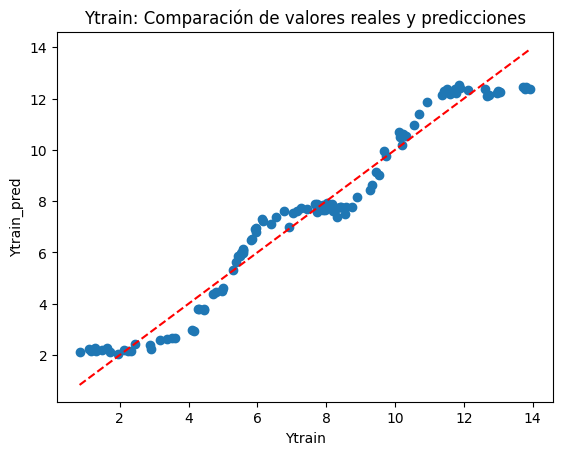

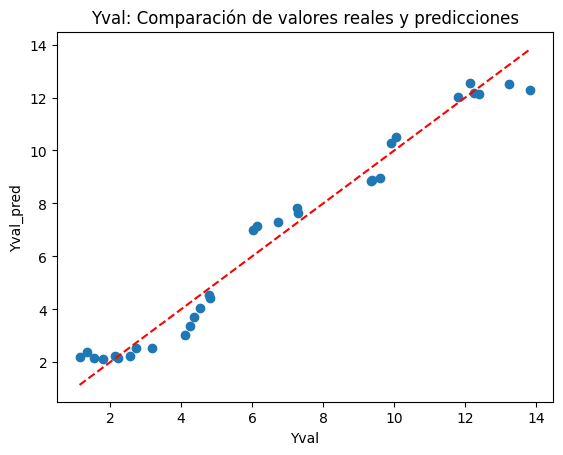

In [85]:
from sklearn.linear_model import Ridge

# Definimos el modelo
model_ridge = Ridge(alpha=1)
 
# Entrenamos el modelo
model_ridge.fit(Xtrain, Ytrain)

# Predecimos
Ytrain_pred = model_ridge.predict(Xtrain)
Yval_pred = model_ridge.predict(Xval)

# Mostramos métricas
print("Ytrain:\n")
calcular_metricas(Ytrain, Ytrain_pred)
print()
print("Yval:\n")
calcular_metricas(Yval, Yval_pred)

# Visualizamos la precisión de los resultados en un scatter plot
plt.scatter(Ytrain, Ytrain_pred)
plt.plot([Ytrain.min(), Ytrain.max()], [Ytrain.min(), Ytrain.max()], 'r--')  # Línea de referencia
plt.xlabel('Ytrain')
plt.ylabel('Ytrain_pred')
plt.title('Ytrain: Comparación de valores reales y predicciones')
plt.show()

plt.scatter(Yval, Yval_pred)
plt.plot([Yval.min(), Yval.max()], [Yval.min(), Yval.max()], 'r--')  # Línea de referencia
plt.xlabel('Yval')
plt.ylabel('Yval_pred')
plt.title('Yval: Comparación de valores reales y predicciones')
plt.show()

Vemos como al no ser lineales los datos y el modelo sí, hay zonas en las que los valores predichos cometen siempre errores por encima de los valores reales, y otras veces por debajo. A pesar de ello, los errores no son demasiado grandes.

<u>**Random Forest**</u>

Utilizamos GridSearchCV para encontrar los mejores hiperparámetros:

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definimos el modelo
model_random_forest = RandomForestRegressor(random_state=123)

# Definir el rango de parámetros a buscar
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [10, 50, 70, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model_random_forest, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Ajustamos el modelo
grid_search.fit(Xtrain, Ytrain)

# Mostramos los mejores parámetros
print()
print("Mejores parámetros:", grid_search.best_params_)

# Evaluamos el modelo con los mejores parámetros
Ytrain_pred = grid_search.best_estimator_.predict(Xtrain)
Yval_pred = grid_search.best_estimator_.predict(Xval)

# Mostramos métricas
print()
print("Ytrain:\n")
calcular_metricas(Ytrain, Ytrain_pred)
print()
print("Yval:\n")
calcular_metricas(Yval, Yval_pred)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Mejores parámetros: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Ytrain:

MAE :  0.15120968016010072
RMSE :  0.20089447738832383
R² :  0.996592347023613

Yval:

MAE :  0.30229380393311844
RMSE :  0.3927379811323478
R² :  0.9901029232277643


Los parámetros {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50} dan muy buenos resultados, sobretodo en Ytrain pero también en Yval.

Entre los posibles valores de max_depth disponibles, [10, 50, 70, None], el mejor ha sido 50, por lo que el random forest seleccionado no tiene exceso de sobreajuste ni de regularización.

Los resultados son mejores que los de los modelos que hemos probado anteriormente para este mismo problema. Esto puede deberse a que estamos usando un ensemble, que al combinar varios modelos da como resultado mejores métricas que si usamos un solo modelo directamente.

Ytrain:

MAE :  0.15120968016010072
RMSE :  0.20089447738832383
R² :  0.996592347023613

Yval:

MAE :  0.30229380393311844
RMSE :  0.3927379811323478
R² :  0.9901029232277643


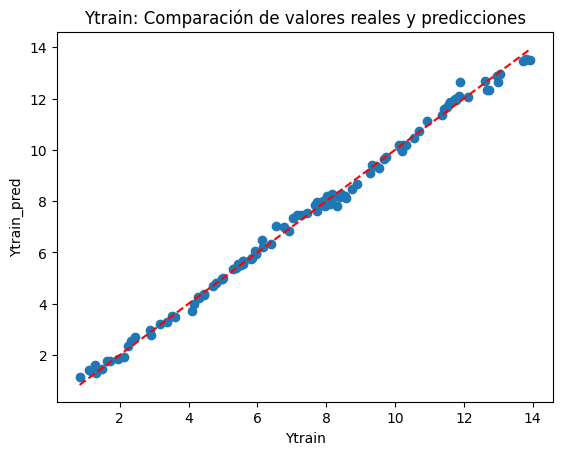

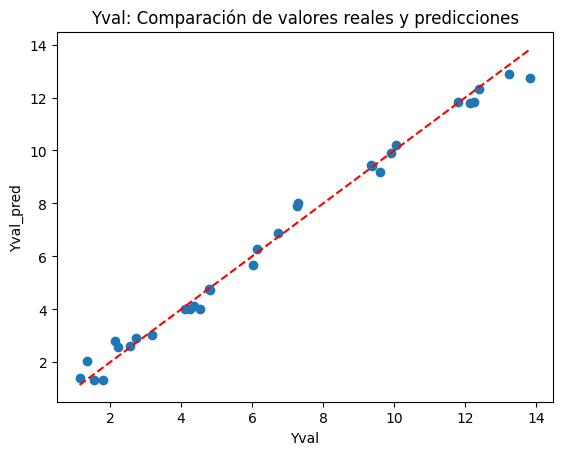

In [87]:
from sklearn.ensemble import RandomForestRegressor

# Definimos el modelo
model_random_forest = RandomForestRegressor(random_state=123, max_depth=50, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=50)
 
# Entrenamos el modelo
model_random_forest.fit(Xtrain, Ytrain)

# Predecimos
Ytrain_pred = model_random_forest.predict(Xtrain)
Yval_pred = model_random_forest.predict(Xval)

# Mostramos métricas
print("Ytrain:\n")
calcular_metricas(Ytrain, Ytrain_pred)
print()
print("Yval:\n")
calcular_metricas(Yval, Yval_pred)

# Visualizamos la precisión de los resultados en un scatter plot
plt.scatter(Ytrain, Ytrain_pred)
plt.plot([Ytrain.min(), Ytrain.max()], [Ytrain.min(), Ytrain.max()], 'r--')  # Línea de referencia
plt.xlabel('Ytrain')
plt.ylabel('Ytrain_pred')
plt.title('Ytrain: Comparación de valores reales y predicciones')
plt.show()

plt.scatter(Yval, Yval_pred)
plt.plot([Yval.min(), Yval.max()], [Yval.min(), Yval.max()], 'r--')  # Línea de referencia
plt.xlabel('Yval')
plt.ylabel('Yval_pred')
plt.title('Yval: Comparación de valores reales y predicciones')
plt.show()

Las métricas son buenas y no se aprecian grandes errores en los scatter plots.

## 2.6 Estimación del error fuera de la muestra

En primer lugar debemos aplicar el preprocesamiento de datos a Xtest e Ytest, sin crear modelos nuevos de SelectKBest y estandarización, es decir, usando los que ya teníamos:

In [88]:
# SelectKBest
Xtest = pd.DataFrame(skb.transform(Xtest))

# Estandarización
Xtest = pd.DataFrame(se.transform(Xtest), columns=Xtest.columns)

Combinamos los datos de entrenamiento más validación para entrenar de nuevo los modelos con todos los datos disponibles, y entonces probar con los datos de test:

In [89]:
Xcombined = pd.concat([Xtrain, Xval], ignore_index=True)
Ycombined = np.concatenate((Ytrain, Yval))

<u>**SVM (Support Vector Machine): SVR (Support Vector Regression)**</u>

Ytest:

MAE :  0.29526943808232275
RMSE :  0.3973560735254262
R² :  0.9862990921595386


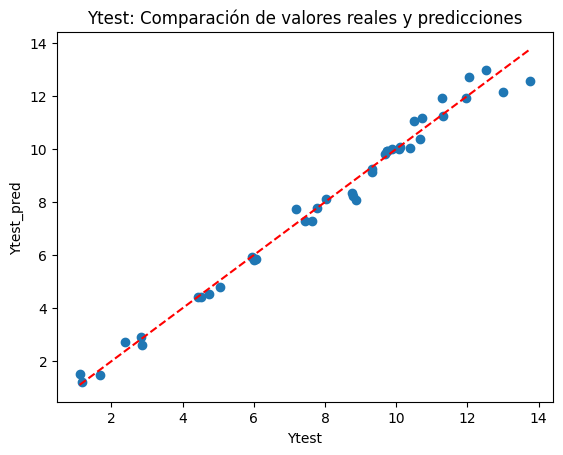

In [90]:
# Entrenamos el modelo con todos los datos de entrenamiento más validación
model_SVR.fit(Xcombined, Ycombined)

# Predecimos
Ytest_pred = model_SVR.predict(Xtest)

# Mostramos métricas
print("Ytest:\n")
calcular_metricas(Ytest, Ytest_pred)

# Visualizamos la precisión de los resultados en un scatter plot
plt.scatter(Ytest, Ytest_pred)
plt.plot([Ytest.min(), Ytest.max()], [Ytest.min(), Ytest.max()], 'r--')  # Línea de referencia
plt.xlabel('Ytest')
plt.ylabel('Ytest_pred')
plt.title('Ytest: Comparación de valores reales y predicciones')
plt.show()

Al igual que ocurría con Ytrain e Yval, con Ytest obtenemos resultados parecidos, un 98 % en r2, por lo que el modelo generaliza bien.

<u>**Regresión Ridge**</u>

Ytest:

MAE :  0.581882929496258
RMSE :  0.6719008960076159
R² :  0.9608258055720349


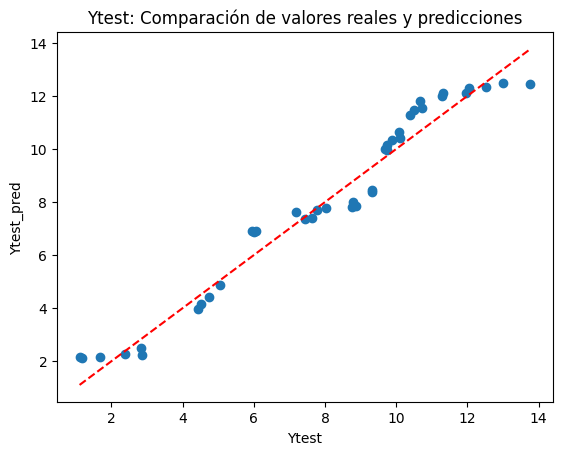

In [91]:
# Entrenamos el modelo con todos los datos de entrenamiento más validación
model_ridge.fit(Xcombined, Ycombined)

# Predecimos
Ytest_pred = model_ridge.predict(Xtest)

# Mostramos métricas
print("Ytest:\n")
calcular_metricas(Ytest, Ytest_pred)

# Visualizamos la precisión de los resultados en un scatter plot
plt.scatter(Ytest, Ytest_pred)
plt.plot([Ytest.min(), Ytest.max()], [Ytest.min(), Ytest.max()], 'r--')  # Línea de referencia
plt.xlabel('Ytest')
plt.ylabel('Ytest_pred')
plt.title('Ytest: Comparación de valores reales y predicciones')
plt.show()

Las métricas en el conjunto de test son muy parecidas a los que habiamos obtenido en train y validación, con resultados buenos, a pesar de las limitaciones ya mencionadas por ser un modelo lineal.

<u>**Random Forest**</u>

Ytest:

MAE :  0.35043325963440664
RMSE :  0.4800349206993751
R² :  0.9800043605336947


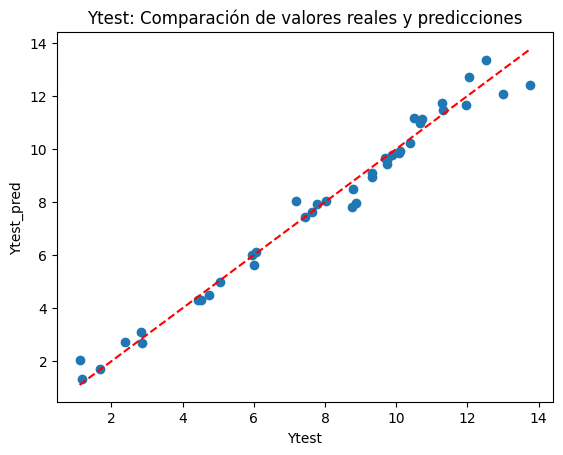

In [92]:
# Entrenamos el modelo con todos los datos de entrenamiento más validación
model_random_forest.fit(Xcombined, Ycombined)

# Predecimos
Ytest_pred = model_random_forest.predict(Xtest)

# Mostramos métricas
print("Ytest:\n")
calcular_metricas(Ytest, Ytest_pred)

# Visualizamos la precisión de los resultados en un scatter plot
plt.scatter(Ytest, Ytest_pred)
plt.plot([Ytest.min(), Ytest.max()], [Ytest.min(), Ytest.max()], 'r--')  # Línea de referencia
plt.xlabel('Ytest')
plt.ylabel('Ytest_pred')
plt.title('Ytest: Comparación de valores reales y predicciones')
plt.show()

Las métricas dan resultados un poco peores que en Ytrain e Yval (posiblemente porque no ha generalizado perfectamente), aunque los resultados siguen siendo bastante buenos.